In [ ]:
!pip install geopandas

In [2]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import kurtosis, skew
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from factor_analyzer import FactorAnalyzer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.decomposition import PCA
from scipy.stats import f_oneway

from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
from factor_analyzer.factor_analyzer import calculate_kmo
from sklearn.metrics import mean_squared_error, r2_score

import openpyxl
import os

from openpyxl.utils.dataframe import dataframe_to_rows
from openpyxl.styles import PatternFill
from openpyxl.formatting.rule import ColorScaleRule
from openpyxl.utils import get_column_letter
from openpyxl import load_workbook


# Análisis Metropolitano

## Tratar DB

In [65]:
# subir pgkg
# Seleccionar nivel de deshabitación: a,b,c,d
#Limpiar columnas no-numéricas


# MAPA_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\DENUE_LOC_NAC\resultados_metropoli.xlsx"

MAPA_ruta = r"Z:\VOCES\DATA\Tratados\NAC\INT_MZN_NAC\resultados_metropoli.xlsx"



MAPA_df = pd.read_excel(MAPA_ruta)

In [66]:
# #limpiar columnas
# MAPA_df_continuo = MAPA_df.drop(columns=['CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
#        'TIPOLOGIA','R_DESHAB_2010', 'R_DESHAB_2020', 'SUBTIPOLOGÍA', 'CVE_EMP',
#        'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df[MAPA_df.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df[MAPA_df.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df[MAPA_df.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df[MAPA_df.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  92
DESHAB A:  1
DESHAB B:  60
DESHAB C:  31
DESHAB D:  0


## Análisis correlacional simple

In [67]:
# # Especificar el archivo de salida y el nombre de la hoja
# excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Correlacional_Metro.xlsx"
# sheet_name = 'Correlaciones'
# sheet_name_2 = 'Correlaciones Significativas'

# Especificar el archivo de salida y el nombre de la hoja
excel_file = r"Z:\VOCES\DATA\Factorial\Nacional\Nacional_Correlacional_Metro.xlsx"
sheet_name = 'Correlaciones'
sheet_name_2 = 'Correlaciones Significativas'

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,1.000000,0.998520,0.999496,0.997735,0.976577,0.998601,0.963930,0.997945,0.976580,0.998614,...,-0.115500,0.973848,0.963660,-0.116286,-0.116635,NaN,0.283236,0.340942,0.189130,0.240324
POPTOT2020,0.998520,1.000000,0.998153,0.999449,0.978154,0.999779,0.965480,0.999530,0.978158,0.999776,...,-0.109060,0.978888,0.966341,-0.110892,-0.112451,NaN,0.284649,0.338628,0.183396,0.232558
VIVTOT2010,0.999496,0.998153,1.000000,0.998182,0.978099,0.998725,0.965784,0.998282,0.978103,0.998738,...,-0.113156,0.973509,0.961716,-0.113528,-0.117047,NaN,0.279845,0.336606,0.179778,0.232264
VIVTOT2020,0.997735,0.999449,0.998182,1.000000,0.980223,0.999621,0.968522,0.999956,0.980227,0.999608,...,-0.105049,0.980071,0.965412,-0.106486,-0.111627,NaN,0.286170,0.338229,0.178892,0.228544
TVIVHAB2010,0.976577,0.978154,0.978099,0.980223,1.000000,0.977777,0.997338,0.980598,1.000000,0.977776,...,-0.079337,0.976321,0.970139,-0.079379,-0.071317,NaN,0.266772,0.309620,0.156363,0.193549
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,0.283236,0.284649,0.279845,0.286170,0.266772,0.283428,0.254346,0.287174,0.266777,0.283369,...,0.019387,0.329180,0.301429,0.021459,-0.047701,NaN,1.000000,0.875002,0.864686,0.788281
DENS_EMP10,0.340942,0.338628,0.336606,0.338229,0.309620,0.336467,0.291319,0.339050,0.309627,0.336409,...,-0.446815,0.316670,0.292103,-0.440261,-0.464021,NaN,0.875002,1.000000,0.791297,0.922187
DENS_UEC20,0.189130,0.183396,0.179778,0.178892,0.156363,0.178848,0.149554,0.180545,0.156363,0.178874,...,-0.041236,0.208838,0.219991,-0.042843,-0.024933,NaN,0.864686,0.791297,1.000000,0.890795


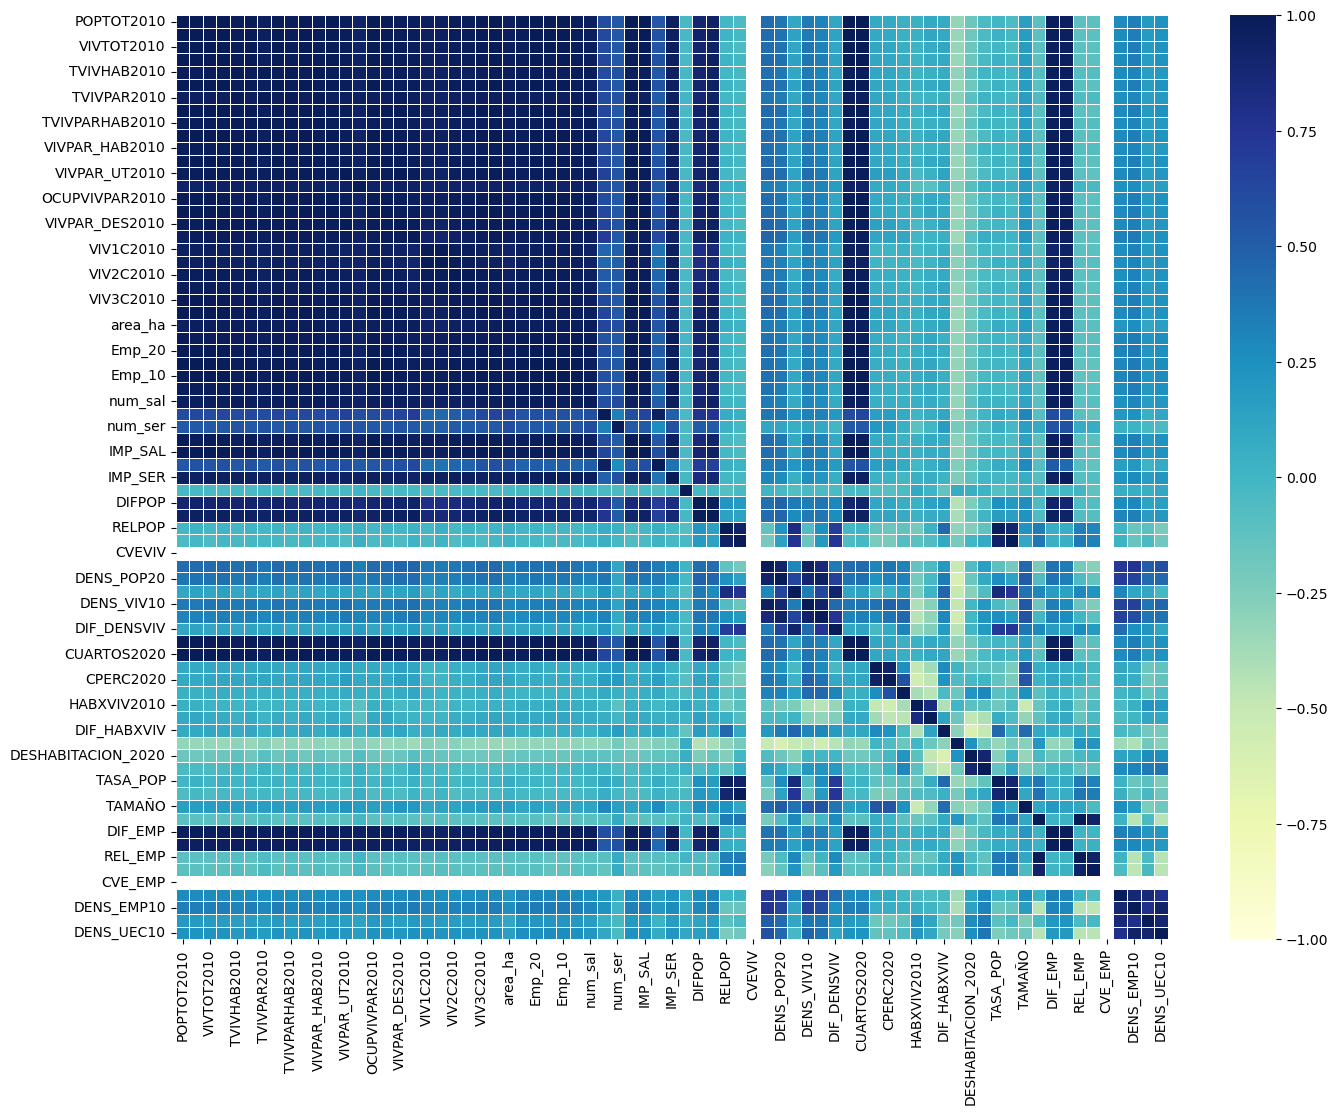

In [68]:
#df a analizar
MAPA_CM_f = MAPA_df

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(16, 12))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

In [69]:
# Guardar las correlaciones en un archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    correlaciones.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
    
    # Agregar título a la tabla de correlaciones
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Cuadro de Correlaciones')

print("El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.")


El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.


In [70]:
# Umbral de correlaciones significativas
threshold = 0.30

# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book
        
        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Filtrar las correlaciones significativas
            correlaciones = pd.read_excel(excel_file, sheet_name=sheet_name, index_col=0)
            significativas = correlaciones[(correlaciones > threshold) | (correlaciones < -threshold)]
            
            # Guardar las correlaciones significativas en una nueva pestaña
            significativas.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Necesario para evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a la tabla de correlaciones
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña {sheet_name_2}.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña Correlaciones Significativas.


### Por deshab

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POPTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TVIVHAB2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_UEC20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


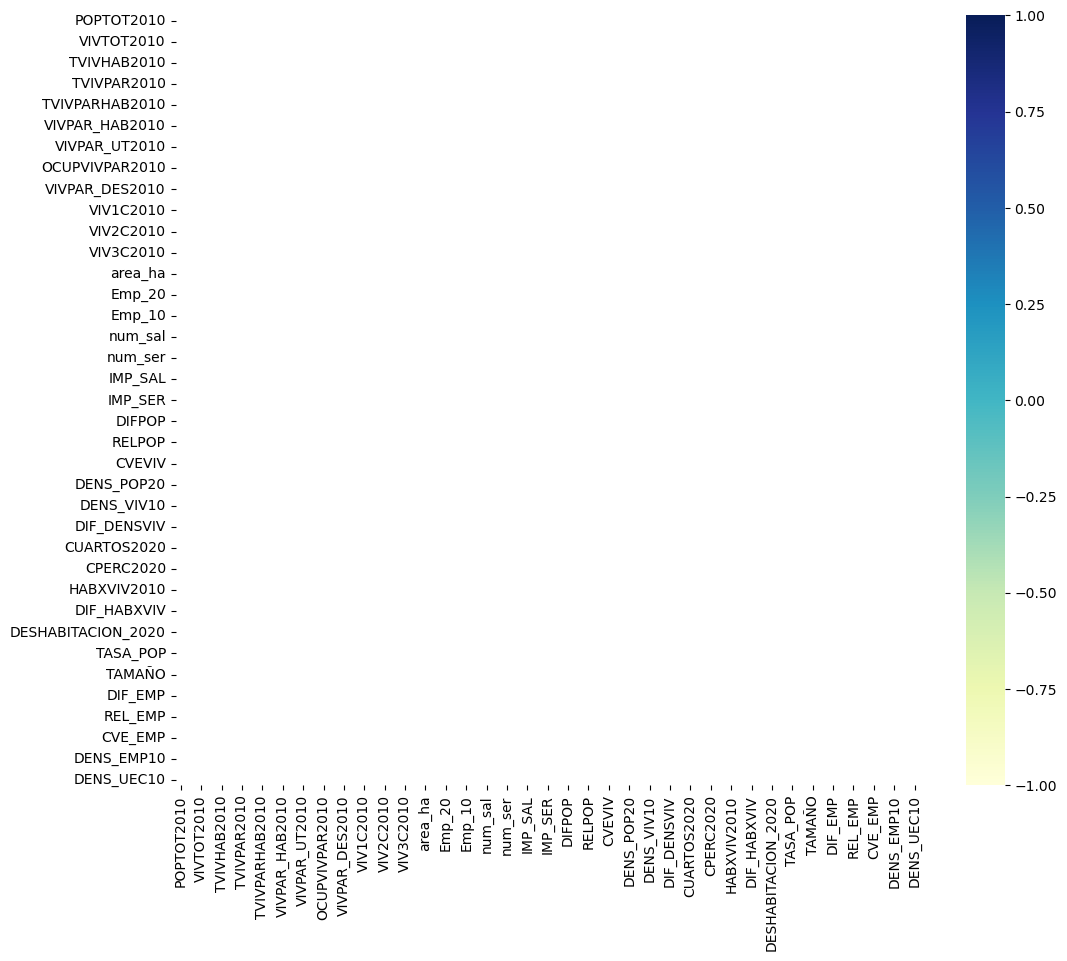

In [71]:
#df a analizar
MAPA_CM_f = MAPA_df_a

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()


,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,1.000000,0.998793,0.999702,0.998255,0.991275,0.998992,0.989500,0.998396,0.991276,0.999005,...,-0.144364,0.982207,0.972574,-0.144749,-0.151982,NaN,0.340958,0.424688,0.259303,0.333318
POPTOT2020,0.998793,1.000000,0.998495,0.999765,0.993304,0.999825,0.991677,0.999825,0.993305,0.999822,...,-0.140286,0.986339,0.974397,-0.141486,-0.150892,NaN,0.345543,0.427099,0.257997,0.331401
VIVTOT2010,0.999702,0.998495,1.000000,0.998323,0.991142,0.999031,0.989036,0.998419,0.991143,0.999045,...,-0.141013,0.981330,0.970252,-0.141172,-0.151887,NaN,0.336902,0.418986,0.250524,0.324870
VIVTOT2020,0.998255,0.999765,0.998323,1.000000,0.992809,0.999828,0.991026,0.999977,0.992810,0.999817,...,-0.135910,0.986662,0.972723,-0.136955,-0.149492,NaN,0.345718,0.425010,0.253177,0.326304
TVIVHAB2010,0.991275,0.993304,0.991142,0.992809,1.000000,0.992560,0.999658,0.993308,1.000000,0.992572,...,-0.143136,0.986339,0.980635,-0.144470,-0.146027,NaN,0.330495,0.412583,0.244983,0.316016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,0.340958,0.345543,0.336902,0.345718,0.330495,0.342361,0.328928,0.345863,0.330493,0.342229,...,0.102817,0.396128,0.378598,0.114312,0.063288,NaN,1.000000,0.879693,0.882893,0.799105
DENS_EMP10,0.424688,0.427099,0.418986,0.425010,0.412583,0.422508,0.411329,0.425522,0.412581,0.422383,...,-0.366477,0.430476,0.416529,-0.355464,-0.369021,NaN,0.879693,1.000000,0.813373,0.924773
DENS_UEC20,0.259303,0.257997,0.250524,0.253177,0.244983,0.252219,0.247596,0.253990,0.244975,0.252183,...,0.016030,0.294956,0.310724,0.020632,0.048924,NaN,0.882893,0.813373,1.000000,0.905493


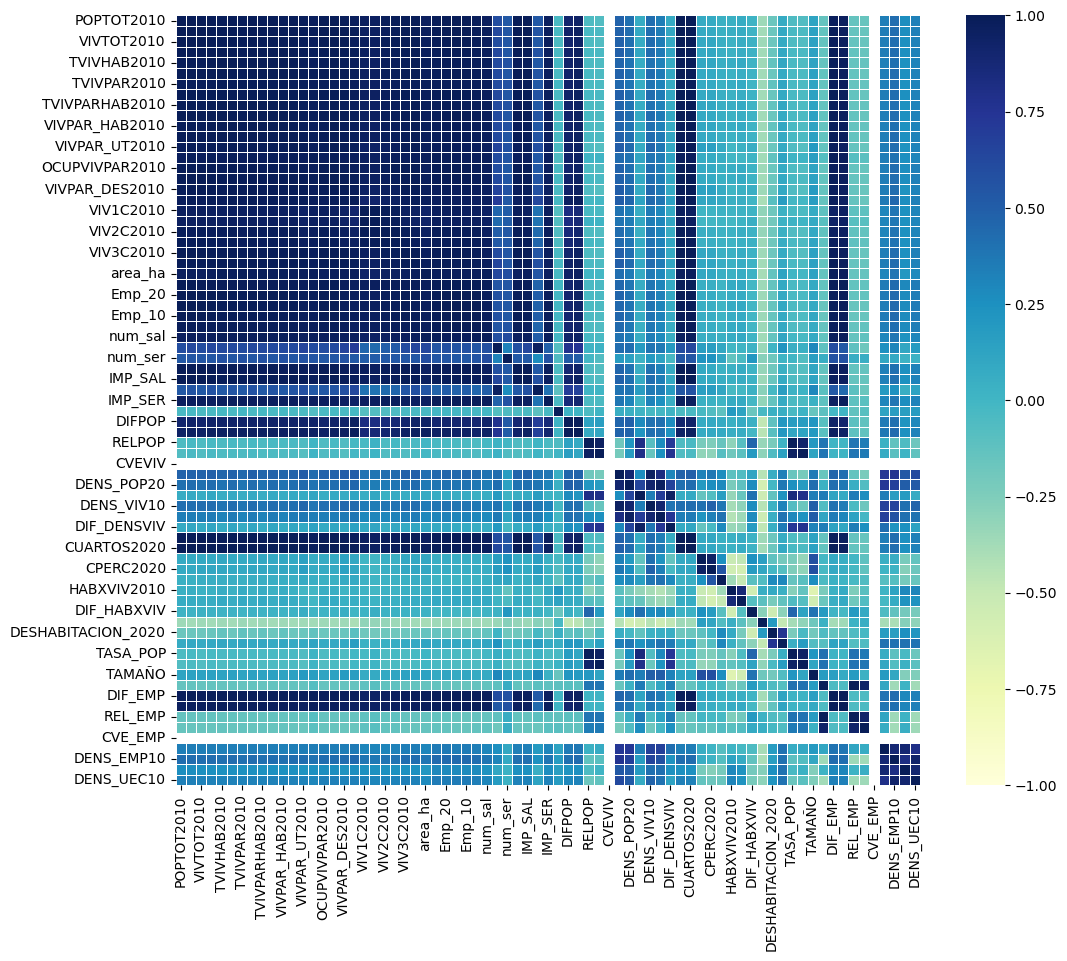

In [72]:
#df a analizar
MAPA_CM_f = MAPA_df_b

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,1.000000,0.992992,0.991974,0.984762,0.825193,0.990293,0.786499,0.982110,0.825205,0.990075,...,-0.058476,0.696058,0.633709,-0.042794,-0.055600,NaN,0.102443,0.110748,-0.185442,-0.119173
POPTOT2020,0.992992,1.000000,0.984148,0.990141,0.825511,0.995225,0.792432,0.990707,0.825522,0.995012,...,-0.006180,0.739995,0.686057,0.004759,-0.010580,NaN,0.091821,0.068873,-0.192775,-0.156808
VIVTOT2010,0.991974,0.984148,1.000000,0.991612,0.816295,0.989470,0.784004,0.986992,0.816314,0.989339,...,-0.063674,0.676526,0.605576,-0.046021,-0.069378,NaN,0.098187,0.112692,-0.188495,-0.112266
VIVTOT2020,0.984762,0.990141,0.991612,1.000000,0.827057,0.993289,0.804059,0.998286,0.827072,0.993177,...,0.001260,0.739932,0.673770,0.013198,-0.018941,NaN,0.098154,0.076089,-0.187872,-0.144424
TVIVHAB2010,0.825193,0.825511,0.816295,0.827057,1.000000,0.814074,0.984918,0.824968,1.000000,0.814017,...,0.212598,0.788909,0.747872,0.225772,0.230195,NaN,0.002703,-0.094994,-0.267028,-0.311546
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,0.102443,0.091821,0.098187,0.098154,0.002703,0.127261,-0.060729,0.110952,0.002750,0.128523,...,-0.130303,0.112994,-0.044152,-0.148107,-0.224215,NaN,1.000000,0.866020,0.839593,0.780754
DENS_EMP10,0.110748,0.068873,0.112692,0.076089,-0.094994,0.107011,-0.174761,0.077710,-0.094942,0.107983,...,-0.583783,-0.177365,-0.326786,-0.586810,-0.612192,NaN,0.866020,1.000000,0.757598,0.931881
DENS_UEC20,-0.185442,-0.192775,-0.188495,-0.187872,-0.267028,-0.170831,-0.298312,-0.178514,-0.266986,-0.169802,...,-0.153255,-0.115908,-0.172082,-0.172906,-0.152106,NaN,0.839593,0.757598,1.000000,0.855081


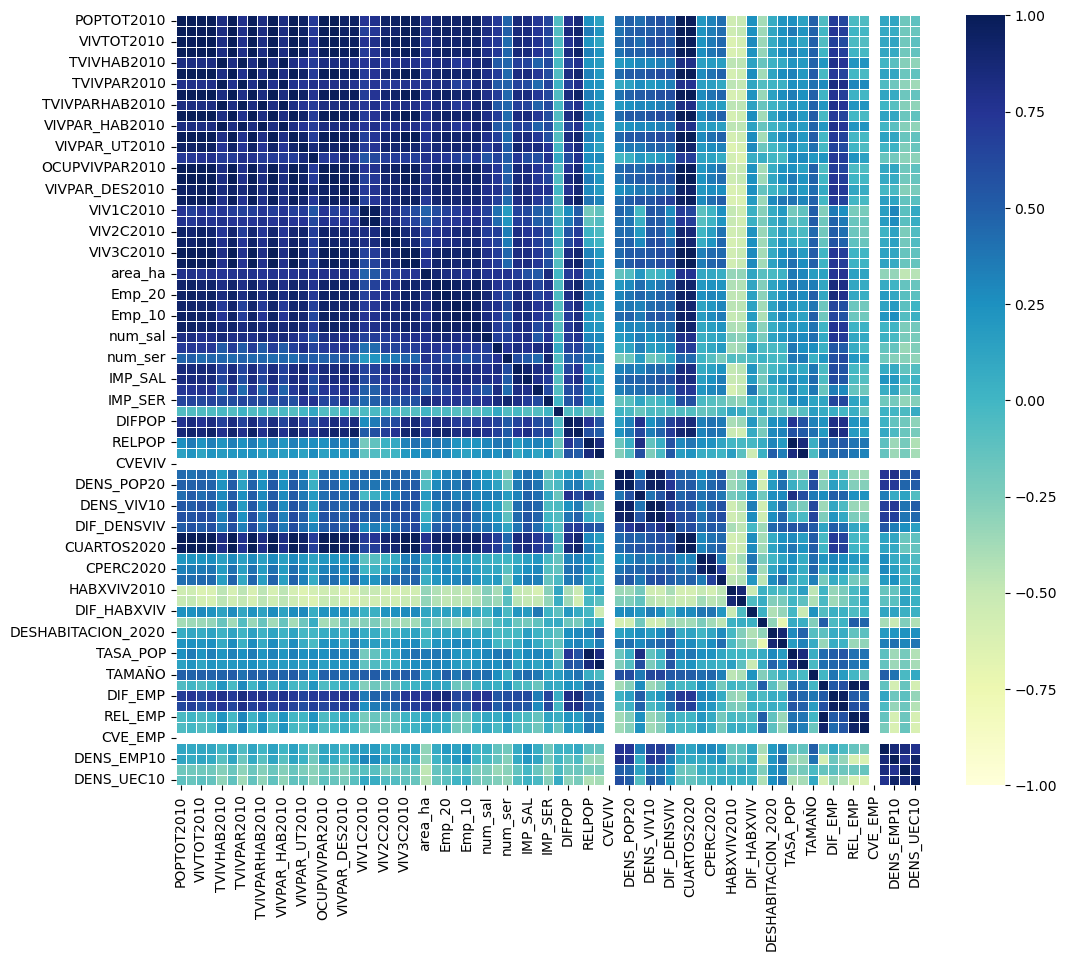

In [73]:
#df a analizar
MAPA_CM_f = MAPA_df_c

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,TVIVPARHAB2020,...,TASA_EMP_MET,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
POPTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
POPTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
VIVTOT2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
TVIVHAB2010,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_UEC20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


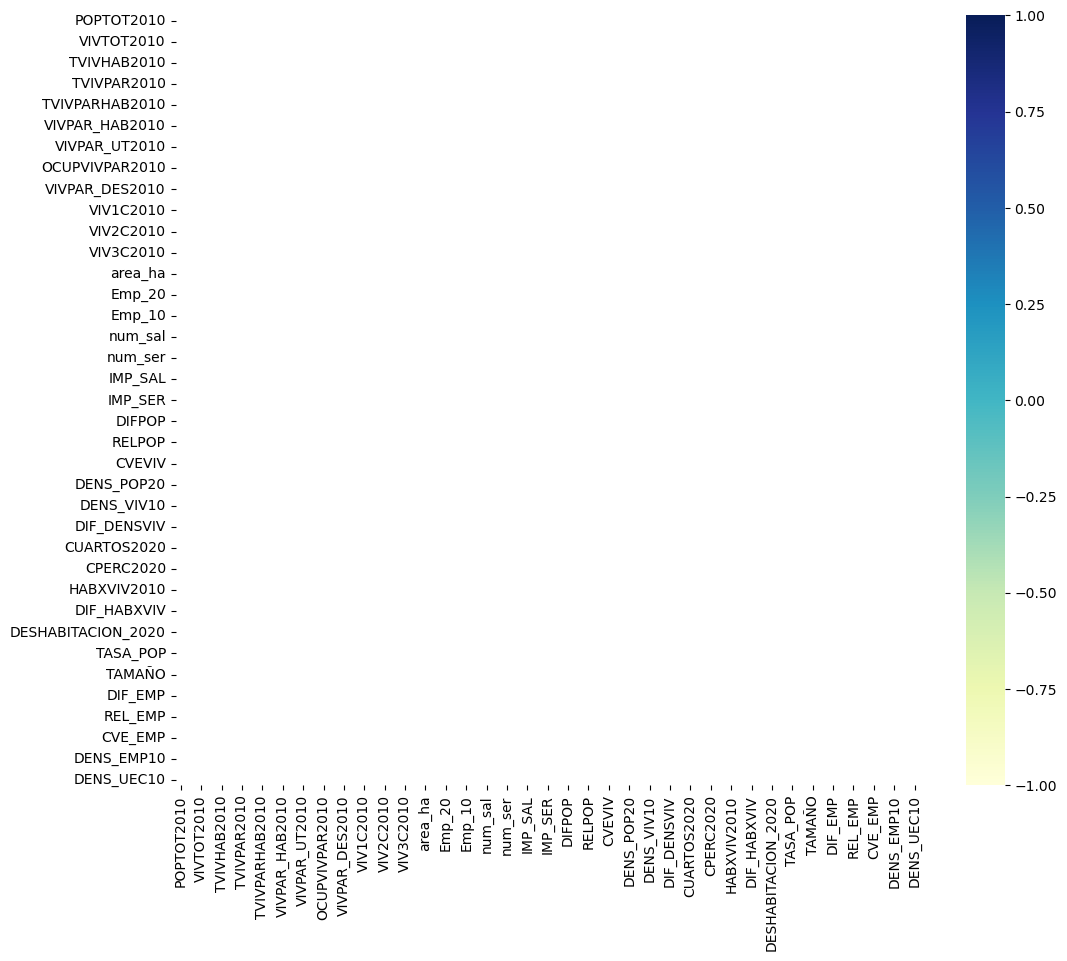

In [74]:
#df a analizar
MAPA_CM_f = MAPA_df_d

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(12, 10))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

## Análisis factorial

In [75]:
#limpiar columnas
MAPA_df_continuo = MAPA_df.drop(columns=['CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
       'TIPOLOGIA','R_DESHAB_2010', 'SUBTIPOLOGÍA', 'CVE_EMP',
       'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df_continuo))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  92
DESHAB A:  1
DESHAB B:  60
DESHAB C:  31
DESHAB D:  0


In [76]:
# # Nombre del archivo y nombre de la pestaña donde deseas guardar los datos
# excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Factorial_Metro.xlsx"

# sheet_name = 'Deshab FULL'
# sheet_name_2 = 'Significativo'

# Nombre del archivo y nombre de la pestaña donde deseas guardar los datos
excel_file = r"Z:\VOCES\DATA\Factorial\Nacional\Nacional_Factorial_Metro.xlsx"

sheet_name = 'Deshab FULL'
sheet_name_2 = 'Significativo'


Chi square
nan nan

Modelo KMO
0.849027394919842



C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Valores propios
[ 4.11230574e+01  7.01820213e+00  6.13413877e+00  4.11108207e+00
  3.02477244e+00  2.21316080e+00  1.50710146e+00  1.05799811e+00
  9.78653239e-01  8.67152676e-01  7.28636816e-01  5.07364082e-01
  4.61779580e-01  3.23705758e-01  2.25580487e-01  2.08343341e-01
  1.03814946e-01  8.52470270e-02  7.77565477e-02  4.76180613e-02
  4.06415330e-02  3.65512542e-02  1.92318857e-02  1.69222511e-02
  1.28934612e-02  1.19140156e-02  1.05157774e-02  9.14227568e-03
  7.73090119e-03  5.74657410e-03  5.05672351e-03  3.73814441e-03
  2.91172899e-03  2.32699841e-03  1.75478826e-03  1.65504383e-03
  1.35845106e-03  1.13607496e-03  1.00338474e-03  7.01037197e-04
  4.57984947e-04  3.92899621e-04  3.10921432e-04  1.93465562e-04
  1.62263557e-04  1.34982327e-04  7.40727205e-05  5.24096231e-05
  3.96748951e-05  2.87633836e-05  2.09906642e-05  1.72837291e-05
  7.35336730e-06  4.85698597e-06  1.62761742e-06  1.13716106e-06
  6.68813525e-07  3.39229970e-07  1.37152910e-07  8.09442954e-08
  2.50953

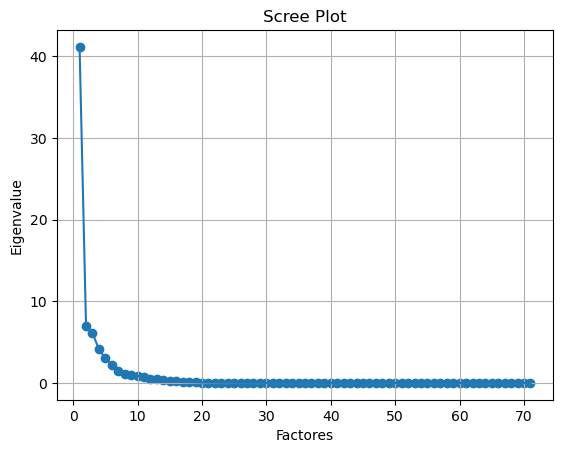

,A1,A2,A3,A4,A5
POPTOT2010,0.987792,0.125895,-0.033076,0.013794,0.044338
POPTOT2020,0.987778,0.133298,-0.006014,0.016273,0.061384
VIVTOT2010,0.987722,0.123769,-0.031653,0.035482,0.047021
VIVTOT2020,0.988095,0.133308,-0.001109,0.037363,0.051413
TVIVHAB2010,0.983589,0.084384,-0.004361,0.057477,-0.002900
...,...,...,...,...,...
REL_UEC,-0.048135,-0.407189,0.516056,0.068442,-0.142690
DENS_EMP20,0.200820,0.780398,0.100815,0.065108,-0.228576
DENS_EMP10,0.235734,0.896224,-0.192834,-0.040591,-0.158096
DENS_UEC20,0.123001,0.679009,-0.003221,-0.257203,-0.386127


,A1,A2,A3,A4,A5
SS Loadings,39.799849,6.775058,6.245495,4.450116,3.144483
Proportion Var,0.560561,0.095423,0.087965,0.062678,0.044288
Cumulative Var,0.560561,0.655985,0.743949,0.806627,0.850916


In [77]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_continuo

# borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# #escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [78]:
# Escribir los loadings en la pestaña especificada del archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
        
    # Agregar título a la tabla de loadings
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Loadings')

print("El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.")

El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.


In [79]:
# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book

        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Guardar los loadings en una nueva pestaña
            loadings_df.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Los loadings han sido guardados exitosamente en la nueva pestaña '{sheet_name_2}'.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña 'Significativo'.


### Rango a

In [80]:
sheet_name = 'Deshab A'

In [81]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_a

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

LinAlgError: 0-dimensional array given. Array must be at least two-dimensional

In [82]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab A del archivo Excel.


### Rango b

In [83]:
sheet_name = 'Deshab B'

Chi square
inf 0.0

Modelo KMO
nan

Valores propios
[ 4.18219175e+01  7.49803867e+00  5.48786136e+00  4.74782135e+00
  2.36978818e+00  2.17411587e+00  1.50117260e+00  1.12083146e+00
  9.86642023e-01  8.80062819e-01  6.03200453e-01  4.84393943e-01
  4.34227563e-01  3.04184532e-01  1.72351553e-01  1.00699342e-01
  8.84817793e-02  5.77104834e-02  4.38624295e-02  2.98570317e-02
  1.79628020e-02  1.33940967e-02  1.14197282e-02  1.01813374e-02
  7.97647849e-03  6.20062479e-03  5.31663850e-03  4.33797180e-03
  3.56230224e-03  2.86967068e-03  2.25857431e-03  1.42900637e-03
  1.28009809e-03  1.17294090e-03  8.71580560e-04  5.99455089e-04
  5.16099825e-04  4.05062724e-04  2.92601509e-04  1.66938133e-04
  1.52913842e-04  1.46350393e-04  9.08684046e-05  5.85647688e-05
  4.50200392e-05  2.69008189e-05  1.45095245e-05  1.15999716e-05
  9.47957453e-06  4.82363207e-06  2.10464859e-06  1.21050706e-06
  3.01416780e-07  1.92789615e-07  1.21369214e-07  3.83379648e-08
  2.93789589e-08  1.42186053e-08  5.22

C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


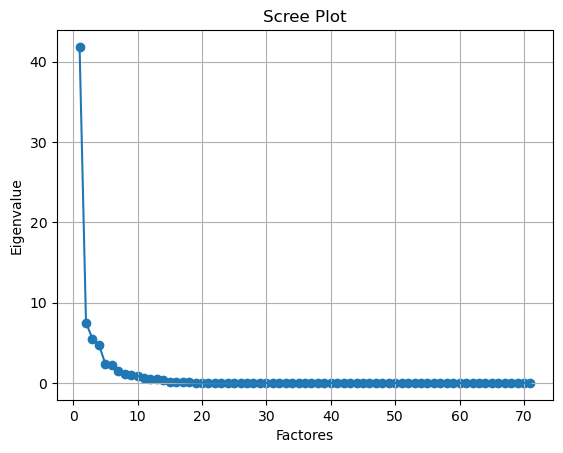

,A1,A2,A3,A4,A5
POPTOT2010,0.991621,-0.011052,0.103700,0.031570,-0.036341
POPTOT2020,0.991748,0.017200,0.107837,0.036344,-0.046206
VIVTOT2010,0.991531,-0.010257,0.098363,0.048362,-0.036013
VIVTOT2020,0.991163,0.020438,0.107374,0.049741,-0.045402
TVIVHAB2010,0.990926,-0.003366,0.090162,0.031832,-0.040815
...,...,...,...,...,...
REL_UEC,-0.102946,0.233776,-0.105162,-0.036719,0.897312
DENS_EMP20,0.261986,0.088043,0.878310,0.033325,0.193439
DENS_EMP10,0.332375,-0.035318,0.844773,-0.030645,-0.236217
DENS_UEC20,0.189941,-0.018606,0.857104,-0.339502,0.179322


,A1,A2,A3,A4,A5
SS Loadings,40.556382,6.321601,6.236038,5.014686,3.053739
Proportion Var,0.571217,0.089037,0.087832,0.070629,0.043010
Cumulative Var,0.571217,0.660253,0.748085,0.818714,0.861725


In [84]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_b

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=5, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5']#,'A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [85]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']


        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab B del archivo Excel.


### Rango c

In [86]:
sheet_name = 'Deshab C'

Chi square
inf 0.0

Modelo KMO
nan

Valores propios
[ 3.78607273e+01  9.99222322e+00  6.06789833e+00  3.65949547e+00
  2.67253976e+00  2.21265957e+00  1.67766221e+00  1.43754461e+00
  1.20268923e+00  9.60897086e-01  7.24853471e-01  6.00509896e-01
  4.36185185e-01  3.17305745e-01  2.62173481e-01  2.56871280e-01
  1.84389930e-01  1.44714433e-01  1.09040290e-01  6.95050519e-02
  4.27900301e-02  3.43590400e-02  2.34908695e-02  1.65855566e-02
  1.17798879e-02  8.36768710e-03  6.50920570e-03  3.52720063e-03
  1.86236515e-03  8.42561636e-04  4.18675085e-15  3.02607289e-15
  1.33833029e-15  1.12789481e-15  1.02262236e-15  8.81102317e-16
  7.81967829e-16  7.26449335e-16  6.84376737e-16  6.25359625e-16
  5.34469514e-16  5.07234420e-16  3.92384113e-16  3.33516347e-16
  2.52408135e-16  2.04548242e-16  1.91039666e-16  1.23782355e-16
  5.50184709e-17  5.41120031e-17  3.50865649e-17 -3.04166147e-17
 -1.16258616e-16 -1.22017128e-16 -2.33408819e-16 -2.63506758e-16
 -3.30360820e-16 -3.73152768e-16 -4.28

C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


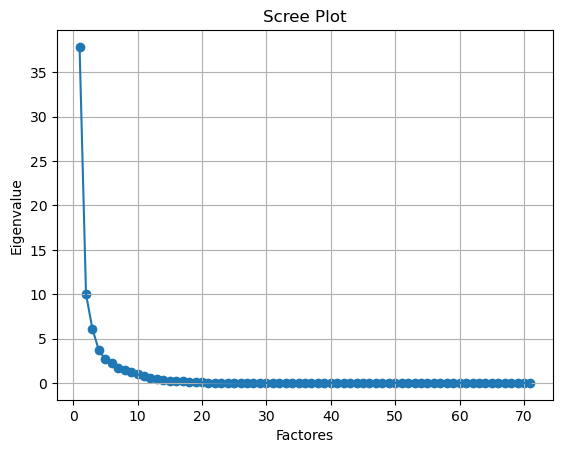

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.969516,0.114586,0.128727,-0.069174,0.097838,-0.064734,-0.065831
POPTOT2020,0.959548,0.100382,0.225222,-0.029925,0.090003,-0.054910,-0.050534
VIVTOT2010,0.954768,0.110321,0.113579,-0.073804,0.204374,-0.074148,-0.050992
VIVTOT2020,0.950308,0.103056,0.194543,-0.014517,0.203098,-0.016085,-0.024090
TVIVHAB2010,0.887388,-0.014458,-0.066844,0.317581,0.045888,0.082284,-0.176351
...,...,...,...,...,...,...,...
REL_UEC,-0.018258,-0.250164,0.194122,0.830943,-0.033069,-0.058941,-0.077257
DENS_EMP20,0.003090,0.986655,-0.005630,0.074154,-0.001886,0.024422,0.058142
DENS_EMP10,0.017270,0.889668,-0.181507,-0.373190,0.012540,0.053138,0.030368
DENS_UEC20,-0.256867,0.808960,-0.059357,0.003178,-0.130450,0.075554,0.124993


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,35.128453,7.780911,6.537358,5.182397,3.436680,2.923905,2.269797
Proportion Var,0.494767,0.109590,0.092075,0.072992,0.048404,0.041182,0.031969
Cumulative Var,0.494767,0.604357,0.696433,0.769424,0.817828,0.859010,0.890979


In [87]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_c

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [88]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab C del archivo Excel.


### Rango d

In [89]:
sheet_name = 'Deshab D'

In [90]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_d

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# Escalar los datos
scaler = StandardScaler()
MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

# Pruebas de esfericidad de Bartlett y KMO
chi_square_value, p_value = calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square:', chi_square_value, 'p_value:', p_value)

kmo_all, kmo_model = calculate_kmo(MAPA_df_f)
print('Modelo KMO:', kmo_model)

# Análisis factorial
fa = FactorAnalyzer(n_factors=41, rotation=None)
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Crear scree plot
plt.scatter(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.plot(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
fa.fit(MAPA_df_f)
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Obtener la varianza de cada factor
fa.get_factor_variance()
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_names, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
display(varianza_df)

ValueError: Found array with 0 sample(s) (shape=(0, 71)) while a minimum of 1 is required by StandardScaler.

In [91]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']



        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab D del archivo Excel.


### revisión de datos

In [ ]:
print(MAPA_df.describe())

In [ ]:
for column in MAPA_df.columns:
    nans = MAPA_df[column].isna().sum()
    infs = np.isinf(MAPA_df[column]).sum()
    if nans > 0 or infs > 0:
        print(f"Columna {column} tiene {nans} NaNs y {infs} valores infinitos")


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para cada columna
for column in MAPA_df.columns:
    plt.figure()
    sns.histplot(MAPA_df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Heatmap para visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(MAPA_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()


# a

# Análisis Municipal

## Tratar DB

In [92]:
# subir pgkg
# Seleccionar nivel de deshabitación: a,b,c,d
#Limpiar columnas no-numéricas


# MAPA_ruta = r"C:\Users\Alejandro\Downloads\DATA\Tratados\NAC\DENUE_LOC_NAC\resultados_municipio.xlsx"

MAPA_ruta = r"Z:\VOCES\DATA\Tratados\NAC\INT_MZN_NAC\resultados_municipio.xlsx"

MAPA_df = pd.read_excel(MAPA_ruta)

In [93]:
# #limpiar columnas
# MAPA_df_continuo = MAPA_df.drop(columns=['CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
#        'TIPOLOGIA','R_DESHAB_2010', 'R_DESHAB_2020', 'SUBTIPOLOGÍA', 'CVE_EMP',
#        'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df[MAPA_df.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df[MAPA_df.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df[MAPA_df.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df[MAPA_df.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  421
DESHAB A:  24
DESHAB B:  253
DESHAB C:  137
DESHAB D:  7


## Análisis correlacional simple

In [94]:
# # Especificar el archivo de salida y el nombre de la hoja
# excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Correlacional_Mun.xlsx"
# sheet_name = 'Correlaciones'
# sheet_name_2 = 'Correlaciones Significativas'

# Especificar el archivo de salida y el nombre de la hoja
excel_file = r"Z:\VOCES\DATA\Factorial\Nacional\Nacional_Correlacional_Mun.xlsx"
sheet_name = 'Correlaciones'
sheet_name_2 = 'Correlaciones Significativas'

,CVEMUN,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,...,TASA_EMP_MUN,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
CVEMUN,1.000000,-0.256885,-0.269433,-0.255384,-0.261785,-0.218016,-0.266842,-0.211025,-0.261892,-0.218025,...,-0.105660,-0.238822,-0.237184,-0.105474,-0.036783,-0.056121,-0.231384,-0.200431,-0.232379,-0.207130
POPTOT2010,-0.256885,1.000000,0.984013,0.991938,0.971039,0.843527,0.980857,0.795555,0.972939,0.843545,...,-0.214713,0.802699,0.742221,-0.197461,-0.228323,0.020916,0.433460,0.415691,0.455559,0.457597
POPTOT2020,-0.269433,0.984013,1.000000,0.984360,0.992459,0.856985,0.997170,0.812236,0.992881,0.857001,...,-0.170017,0.839123,0.795555,-0.157477,-0.188571,0.034590,0.396111,0.373306,0.407907,0.403570
VIVTOT2010,-0.255384,0.991938,0.984360,1.000000,0.984745,0.867564,0.988461,0.821793,0.985174,0.867582,...,-0.202002,0.818320,0.745276,-0.185338,-0.219050,0.031647,0.448274,0.428719,0.447078,0.451146
VIVTOT2020,-0.261785,0.971039,0.992459,0.984745,1.000000,0.876481,0.996309,0.836879,0.999259,0.876496,...,-0.155430,0.854280,0.797466,-0.143714,-0.177612,0.044164,0.414740,0.389561,0.404759,0.401933
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,-0.056121,0.020916,0.034590,0.031647,0.044164,0.061409,0.036883,0.062976,0.044055,0.061427,...,0.306418,0.099588,0.108288,0.219591,0.183838,1.000000,0.016301,-0.033796,-0.022558,-0.093537
DENS_EMP20,-0.231384,0.433460,0.396111,0.448274,0.414740,0.253465,0.424674,0.226239,0.413289,0.253474,...,-0.237602,0.382926,0.202356,-0.210750,-0.247776,0.016301,1.000000,0.986393,0.889362,0.906907
DENS_EMP10,-0.200431,0.415691,0.373306,0.428719,0.389561,0.221321,0.401414,0.193524,0.388345,0.221330,...,-0.324338,0.309470,0.128396,-0.284147,-0.308863,-0.033796,0.986393,1.000000,0.877406,0.927986
DENS_UEC20,-0.232379,0.455559,0.407907,0.447078,0.404759,0.249002,0.418571,0.219682,0.407784,0.249010,...,-0.282081,0.314720,0.235274,-0.256990,-0.262299,-0.022558,0.889362,0.877406,1.000000,0.968872


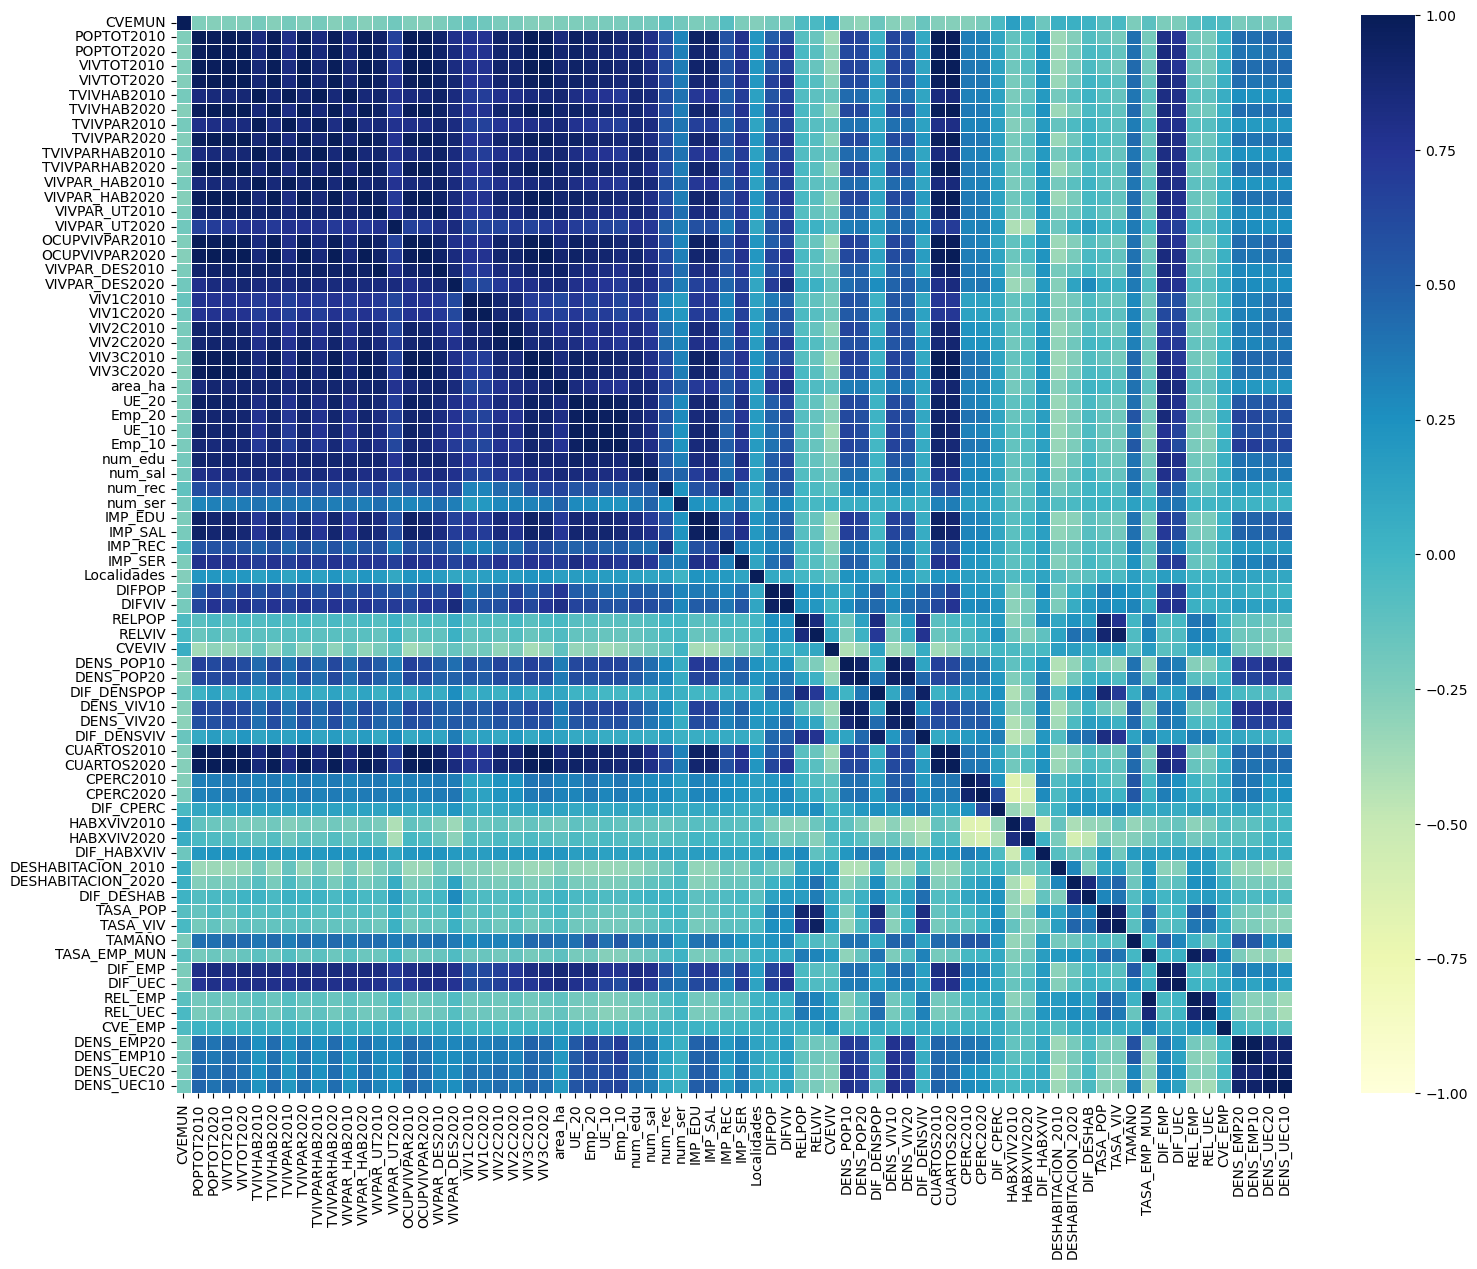

In [95]:
#df a analizar
MAPA_CM_f = MAPA_df

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

In [96]:
# Guardar las correlaciones en un archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    correlaciones.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
    
    # Agregar título a la tabla de correlaciones
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Cuadro de Correlaciones')

print("El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.")


El archivo Excel ha sido creado y las correlaciones han sido guardadas exitosamente.


In [97]:
# Umbral de correlaciones significativas
threshold = 0.30

# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book
        
        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Filtrar las correlaciones significativas
            correlaciones = pd.read_excel(excel_file, sheet_name=sheet_name, index_col=0)
            significativas = correlaciones[(correlaciones > threshold) | (correlaciones < -threshold)]
            
            # Guardar las correlaciones significativas en una nueva pestaña
            significativas.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Necesario para evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a la tabla de correlaciones
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña {sheet_name_2}.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Las correlaciones significativas han sido guardadas exitosamente en la nueva pestaña Correlaciones Significativas.


### Por deshab

,CVEMUN,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,...,TASA_EMP_MUN,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
CVEMUN,1.000000,-0.596541,-0.630821,-0.625036,-0.643345,-0.605621,-0.640250,-0.605224,-0.637990,-0.605622,...,0.082095,-0.652623,-0.609578,0.166325,0.351733,-0.338253,-0.563113,-0.495288,-0.429727,-0.387319
POPTOT2010,-0.596541,1.000000,0.975478,0.993522,0.962745,0.914121,0.966733,0.906737,0.970880,0.914132,...,-0.306112,0.654783,0.709721,-0.338712,-0.461794,-0.035267,0.597934,0.612968,0.648485,0.635065
POPTOT2020,-0.630821,0.975478,1.000000,0.991093,0.997314,0.966672,0.998389,0.962733,0.997850,0.966675,...,-0.237648,0.757606,0.815295,-0.274166,-0.353777,0.001970,0.489361,0.498746,0.528294,0.513421
VIVTOT2010,-0.625036,0.993522,0.991093,1.000000,0.985724,0.943340,0.987830,0.937400,0.990704,0.943348,...,-0.281911,0.708252,0.757983,-0.317186,-0.425477,-0.005880,0.568091,0.579438,0.597668,0.584803
VIVTOT2020,-0.643345,0.962745,0.997314,0.985724,1.000000,0.970221,0.999809,0.967027,0.999077,0.970222,...,-0.228773,0.776794,0.825880,-0.266327,-0.342235,0.017321,0.482276,0.489957,0.500390,0.487938
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,-0.338253,-0.035267,0.001970,-0.005880,0.017321,0.122478,0.013474,0.124493,0.014928,0.122479,...,0.544739,0.328606,0.305115,0.438211,0.268558,1.000000,0.064356,-0.068093,-0.138425,-0.231318
DENS_EMP20,-0.563113,0.597934,0.489361,0.568091,0.482276,0.367967,0.486491,0.355664,0.498984,0.367988,...,-0.341497,0.216557,0.128474,-0.374406,-0.698896,0.064356,1.000000,0.978174,0.843277,0.838305
DENS_EMP10,-0.495288,0.612968,0.498746,0.579438,0.489957,0.362630,0.493909,0.350018,0.509145,0.362650,...,-0.472700,0.114670,0.066964,-0.495126,-0.774978,-0.068093,0.978174,1.000000,0.896473,0.908844
DENS_UEC20,-0.429727,0.648485,0.528294,0.597668,0.500390,0.389823,0.507998,0.377329,0.520923,0.389845,...,-0.458554,0.012723,0.083404,-0.478356,-0.705761,-0.138425,0.843277,0.896473,1.000000,0.989495


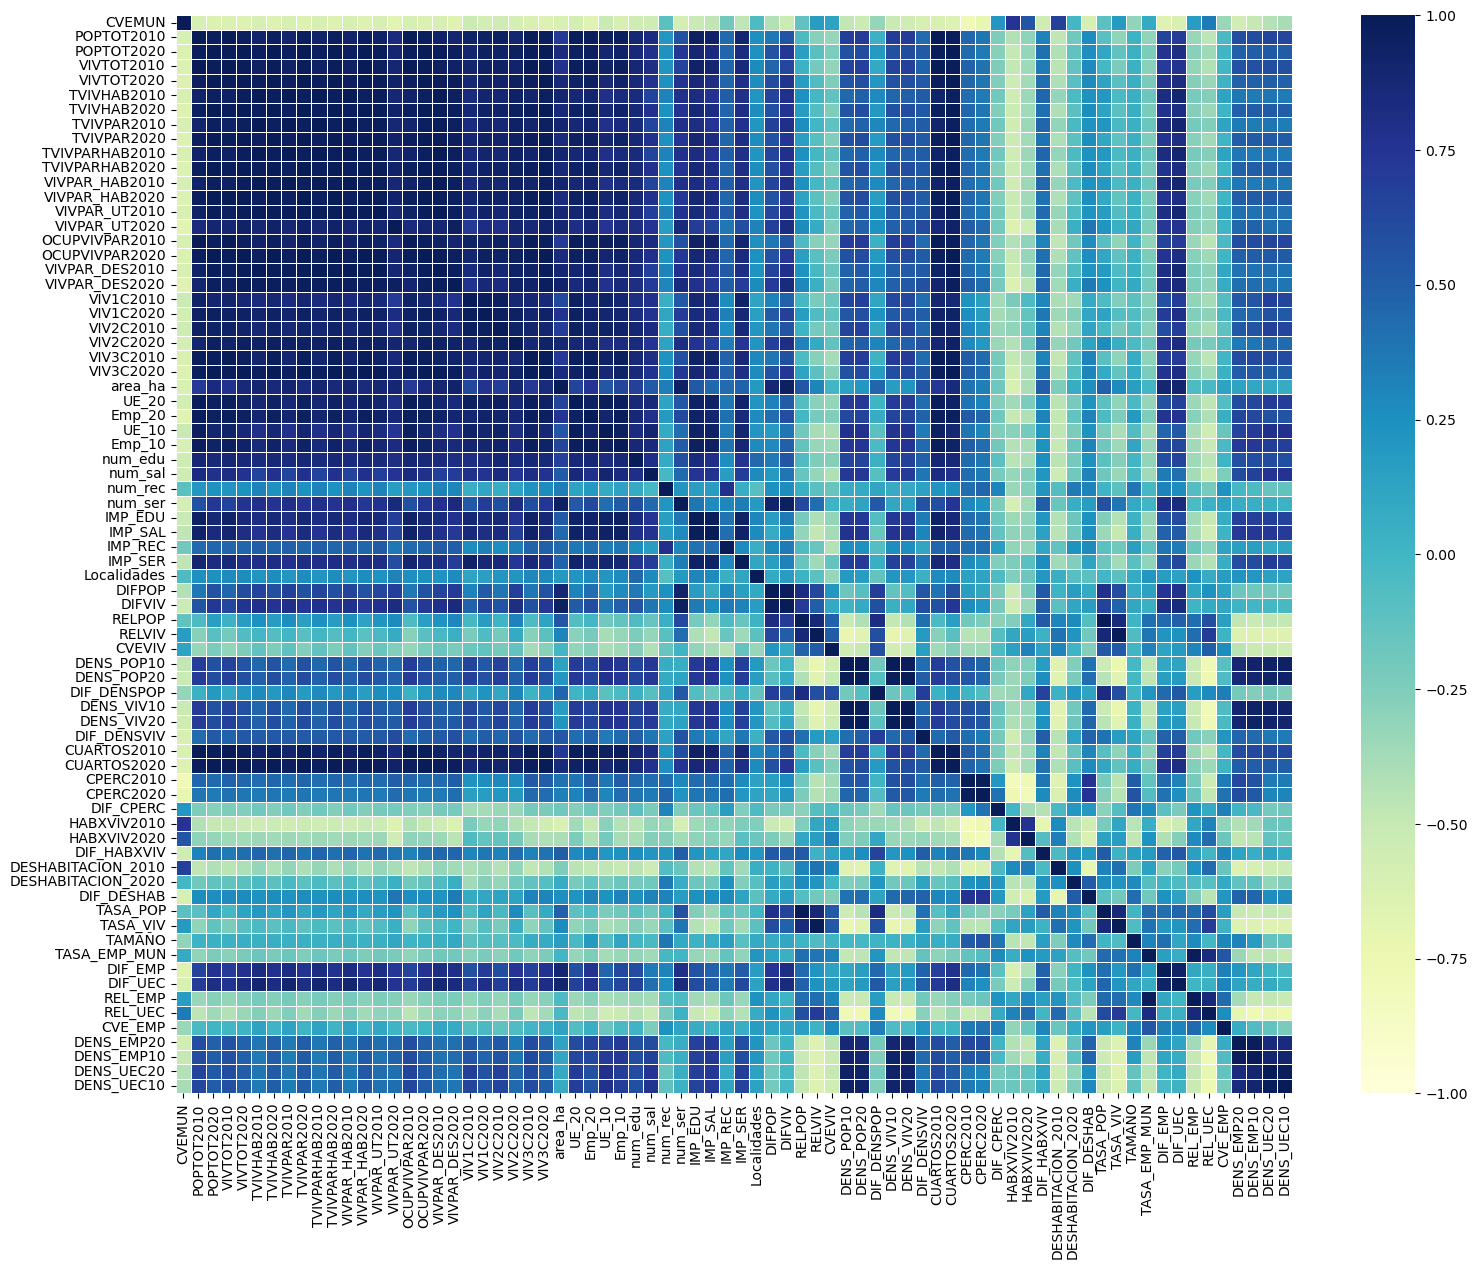

In [98]:
#df a analizar
MAPA_CM_f = MAPA_df_a

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()


,CVEMUN,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,...,TASA_EMP_MUN,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
CVEMUN,1.000000,-0.262423,-0.274010,-0.264100,-0.271710,-0.280461,-0.275041,-0.282150,-0.273709,-0.280461,...,-0.124594,-0.252608,-0.252877,-0.126780,-0.004055,-0.095236,-0.218378,-0.194936,-0.199961,-0.185817
POPTOT2010,-0.262423,1.000000,0.987848,0.992823,0.982590,0.916099,0.985578,0.902744,0.984109,0.916106,...,-0.179281,0.849017,0.772446,-0.174483,-0.253053,0.075865,0.362225,0.339211,0.366383,0.363974
POPTOT2020,-0.274010,0.987848,1.000000,0.983721,0.995315,0.925119,0.996471,0.912614,0.995734,0.925126,...,-0.155689,0.877337,0.817910,-0.154189,-0.232931,0.078473,0.338662,0.311829,0.338142,0.330850
VIVTOT2010,-0.264100,0.992823,0.983721,1.000000,0.988512,0.925930,0.989788,0.911798,0.989058,0.925937,...,-0.173910,0.857186,0.761781,-0.168521,-0.253897,0.077197,0.393052,0.368912,0.375619,0.377106
VIVTOT2020,-0.271710,0.982590,0.995315,0.988512,1.000000,0.929111,0.999287,0.916129,0.999370,0.929119,...,-0.149719,0.892605,0.812315,-0.147391,-0.233278,0.080014,0.375205,0.346436,0.354690,0.350457
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,-0.095236,0.075865,0.078473,0.077197,0.080014,0.062170,0.078987,0.059286,0.080026,0.062198,...,0.305919,0.087395,0.094245,0.232153,0.196898,1.000000,0.031412,-0.007110,0.007060,-0.052702
DENS_EMP20,-0.218378,0.362225,0.338662,0.393052,0.375205,0.214406,0.377803,0.206699,0.370446,0.214410,...,-0.218103,0.354184,0.145879,-0.193979,-0.262150,0.031412,1.000000,0.989095,0.897014,0.918559
DENS_EMP10,-0.194936,0.339211,0.311829,0.368912,0.346436,0.182738,0.350474,0.174115,0.342154,0.182742,...,-0.299011,0.288953,0.078794,-0.266187,-0.324288,-0.007110,0.989095,1.000000,0.885907,0.936547
DENS_UEC20,-0.199961,0.366383,0.338142,0.375619,0.354690,0.209123,0.358156,0.202331,0.354334,0.209123,...,-0.240844,0.297378,0.188635,-0.219213,-0.253477,0.007060,0.897014,0.885907,1.000000,0.969873


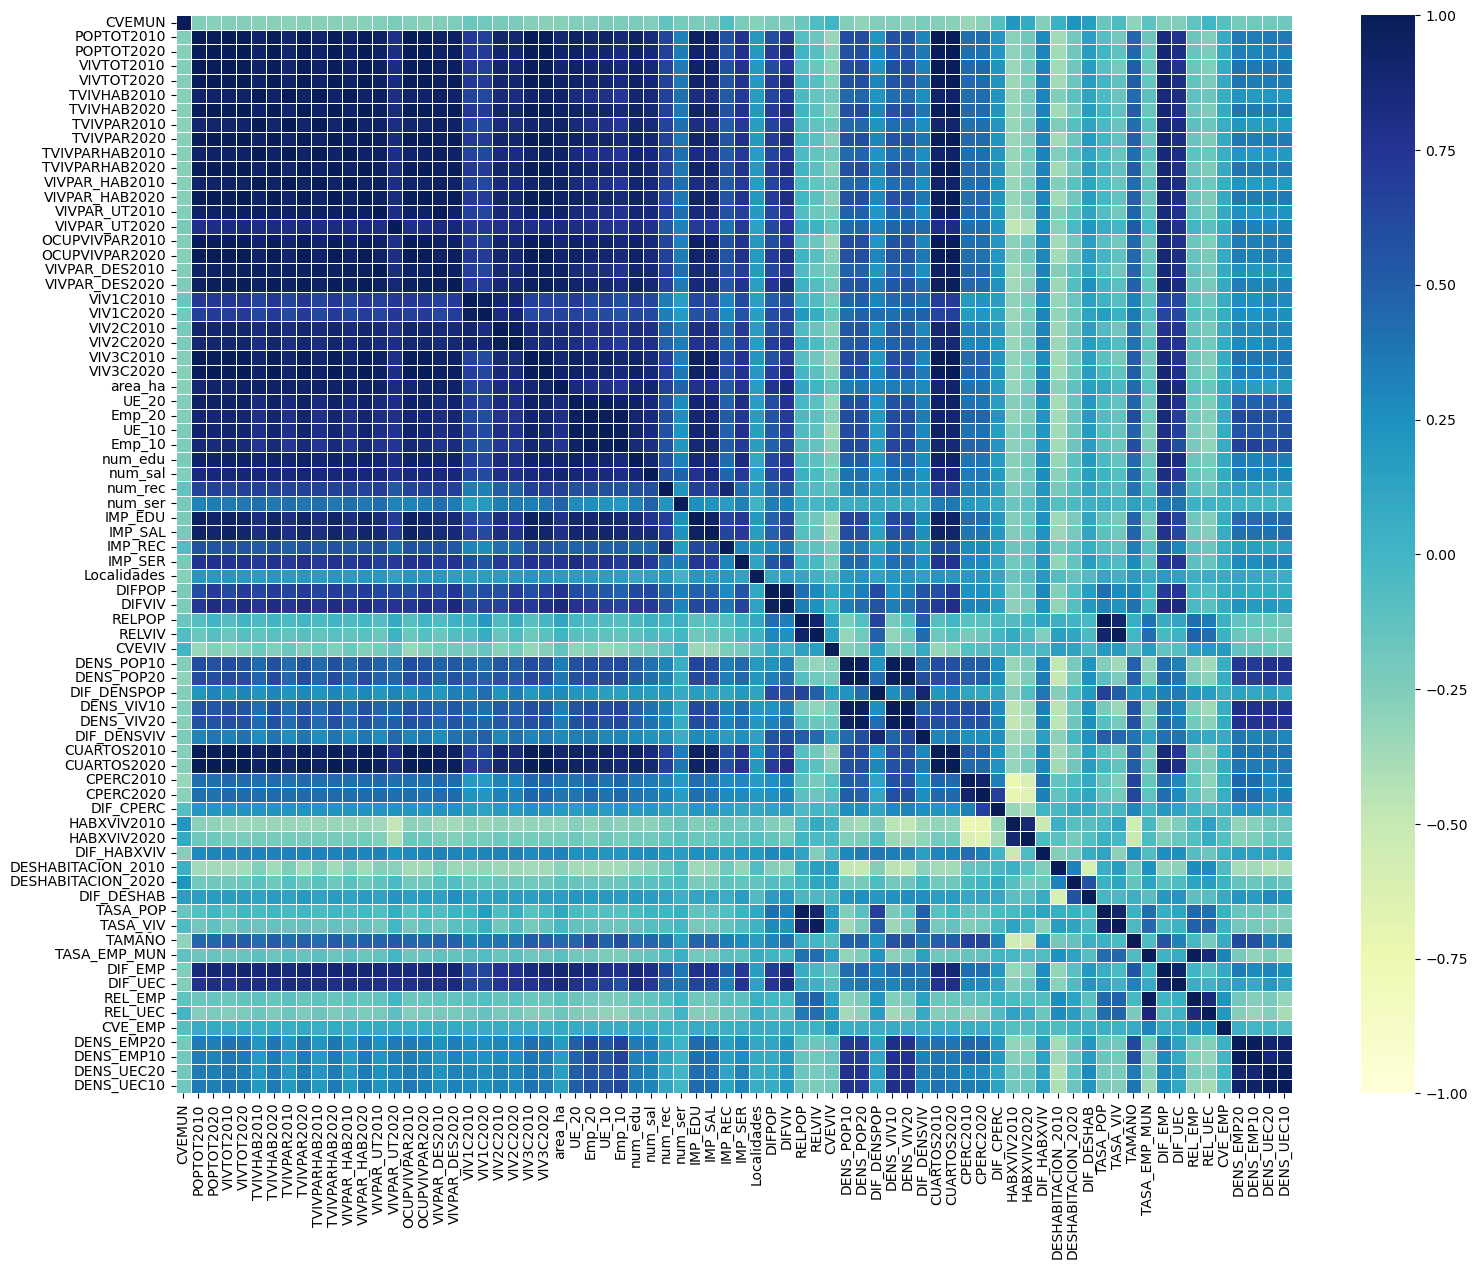

In [99]:
#df a analizar
MAPA_CM_f = MAPA_df_b

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,CVEMUN,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,...,TASA_EMP_MUN,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
CVEMUN,1.000000,-0.009618,-0.034740,-0.003980,-0.022457,0.008892,-0.014883,-0.002010,-0.018009,0.008885,...,-0.140383,-0.050639,-0.059545,-0.139890,-0.112195,0.053723,-0.179155,-0.106983,-0.220034,-0.167327
POPTOT2010,-0.009618,1.000000,0.962131,0.992713,0.958222,0.849880,0.963452,0.794994,0.953992,0.849883,...,-0.164056,0.763417,0.719377,-0.153598,-0.148384,0.093993,0.518426,0.507934,0.374092,0.391890
POPTOT2020,-0.034740,0.962131,1.000000,0.965712,0.993869,0.796521,0.997642,0.752307,0.993514,0.796522,...,-0.053184,0.761175,0.745380,-0.052436,-0.054549,0.100885,0.423312,0.390788,0.291028,0.283920
VIVTOT2010,-0.003980,0.992713,0.965712,1.000000,0.971565,0.842655,0.971830,0.792901,0.965591,0.842663,...,-0.141774,0.730779,0.687023,-0.130471,-0.127477,0.090501,0.481433,0.471753,0.339905,0.358139
VIVTOT2020,-0.022457,0.958222,0.993869,0.971565,1.000000,0.800088,0.996730,0.762950,0.998510,0.800092,...,-0.048399,0.742934,0.721412,-0.047486,-0.050676,0.097904,0.409437,0.380098,0.275134,0.271972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,0.053723,0.093993,0.100885,0.090501,0.097904,0.081512,0.098491,0.083587,0.098968,0.081527,...,0.269502,0.088317,0.100437,0.188198,0.188368,1.000000,0.065945,-0.030522,0.075611,-0.031629
DENS_EMP20,-0.179155,0.518426,0.423312,0.481433,0.409437,0.378371,0.429387,0.317412,0.418309,0.378377,...,-0.267398,0.522448,0.443399,-0.258840,-0.267812,0.065945,1.000000,0.948959,0.932618,0.915883
DENS_EMP10,-0.106983,0.507934,0.390788,0.471753,0.380098,0.338946,0.398275,0.272044,0.384549,0.338953,...,-0.491456,0.390340,0.304022,-0.449498,-0.441975,-0.030522,0.948959,1.000000,0.888466,0.966337
DENS_UEC20,-0.220034,0.374092,0.291028,0.339905,0.275134,0.240078,0.291474,0.190660,0.282368,0.240082,...,-0.284238,0.376284,0.354502,-0.280984,-0.250406,0.075611,0.932618,0.888466,1.000000,0.938901


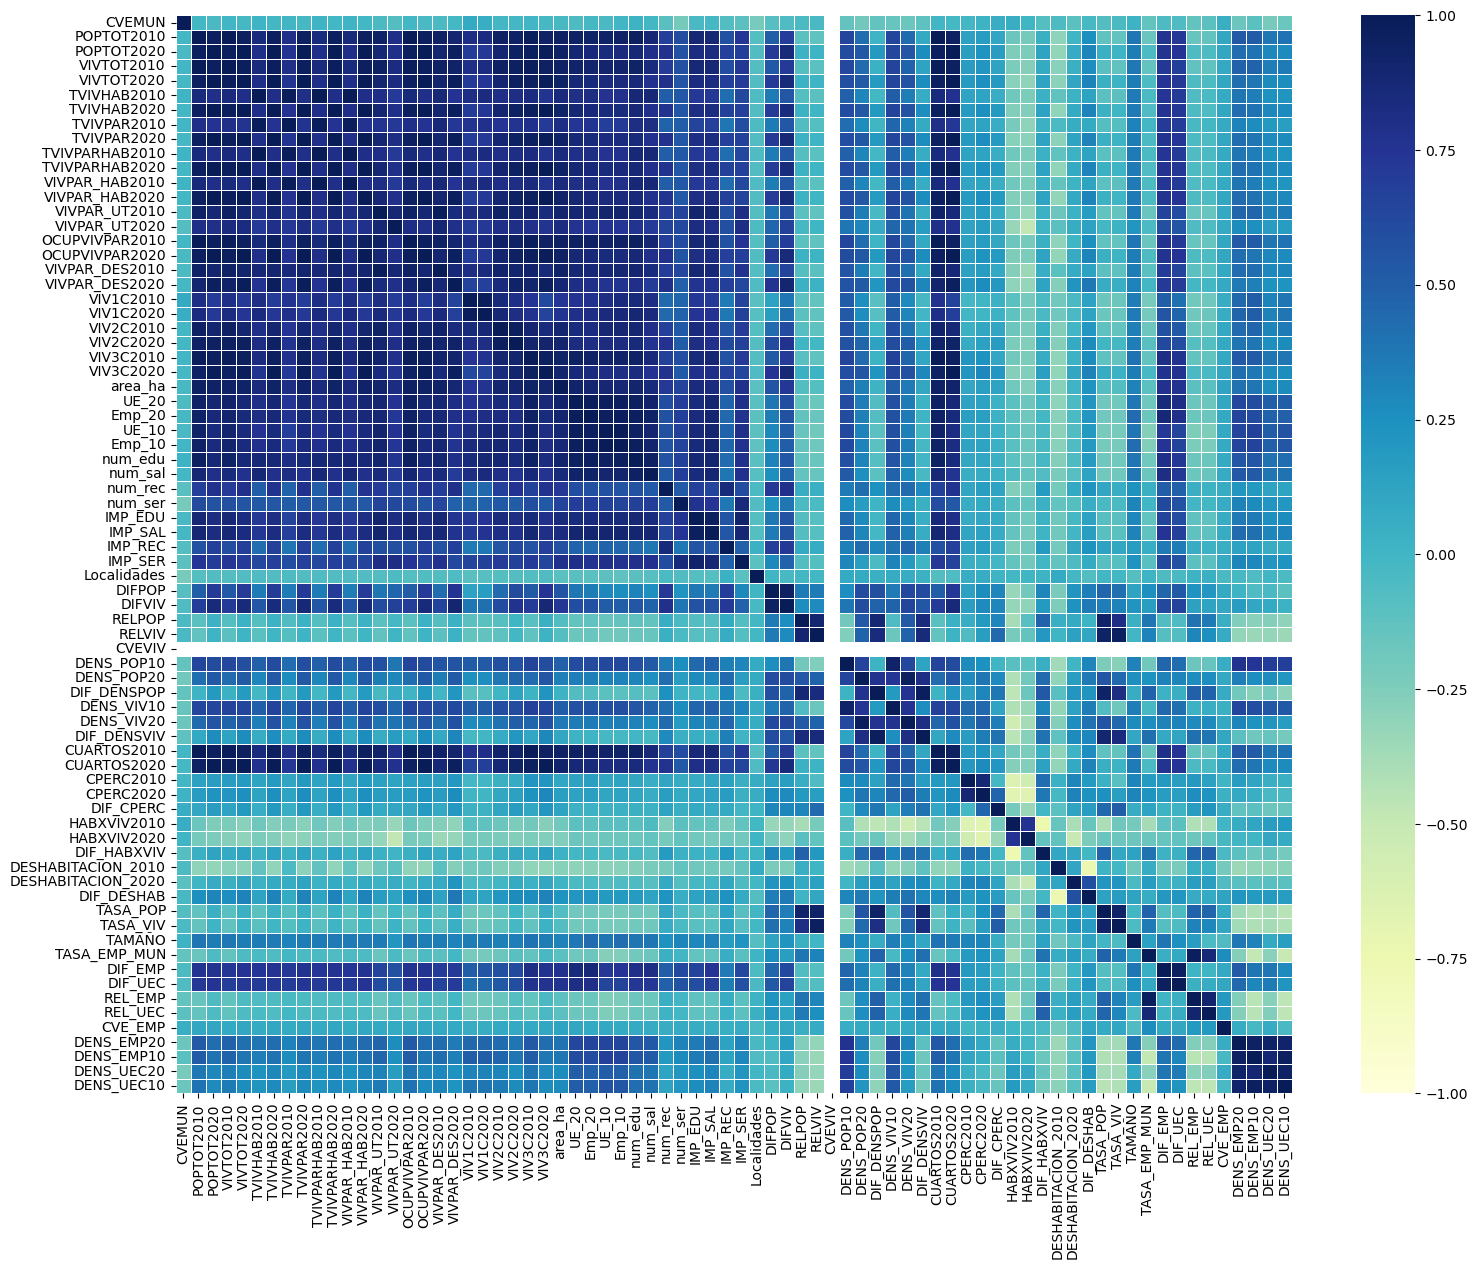

In [100]:
#df a analizar
MAPA_CM_f = MAPA_df_c

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

,CVEMUN,POPTOT2010,POPTOT2020,VIVTOT2010,VIVTOT2020,TVIVHAB2010,TVIVHAB2020,TVIVPAR2010,TVIVPAR2020,TVIVPARHAB2010,...,TASA_EMP_MUN,DIF_EMP,DIF_UEC,REL_EMP,REL_UEC,CVE_EMP,DENS_EMP20,DENS_EMP10,DENS_UEC20,DENS_UEC10
CVEMUN,1.000000,-0.039613,-0.082414,-0.186217,-0.154347,-0.019443,-0.114882,0.004342,-0.146230,-0.020231,...,-0.136906,-0.111060,-0.188563,-0.189824,-0.339717,NaN,0.020892,0.284265,-0.014651,0.511911
POPTOT2010,-0.039613,1.000000,0.982635,0.964460,0.956027,0.756767,0.976103,0.873190,0.956019,0.756789,...,0.198718,0.890983,0.862890,0.153259,0.204765,NaN,0.168468,0.056184,0.112068,-0.070223
POPTOT2020,-0.082414,0.982635,1.000000,0.957607,0.990623,0.646312,0.998594,0.822133,0.991062,0.646356,...,0.122074,0.893116,0.863363,0.085730,0.151256,NaN,0.176851,0.164162,0.118987,0.029145
VIVTOT2010,-0.186217,0.964460,0.957607,1.000000,0.958862,0.638334,0.964231,0.750021,0.956270,0.638492,...,0.329402,0.894138,0.888332,0.298847,0.391864,NaN,0.359461,0.164146,0.309369,-0.050181
VIVTOT2020,-0.154347,0.956027,0.990623,0.958862,1.000000,0.563738,0.995951,0.750199,0.999841,0.563832,...,0.108165,0.888720,0.869128,0.081825,0.182084,NaN,0.223137,0.242831,0.164234,0.055210
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
CVE_EMP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
DENS_EMP20,0.020892,0.168468,0.176851,0.359461,0.223137,-0.268541,0.205918,-0.223312,0.219801,-0.268463,...,0.761591,0.334035,0.356511,0.773535,0.783937,NaN,1.000000,0.572034,0.994473,0.400398
DENS_EMP10,0.284265,0.056184,0.164162,0.164146,0.242831,-0.536323,0.192043,-0.292782,0.241834,-0.536522,...,-0.091134,0.075162,0.064993,-0.075015,0.020179,NaN,0.572034,1.000000,0.537249,0.836673
DENS_UEC20,-0.014651,0.112068,0.118987,0.309369,0.164234,-0.301618,0.148856,-0.252339,0.159845,-0.301492,...,0.778730,0.266543,0.289535,0.792421,0.783139,NaN,0.994473,0.537249,1.000000,0.397596


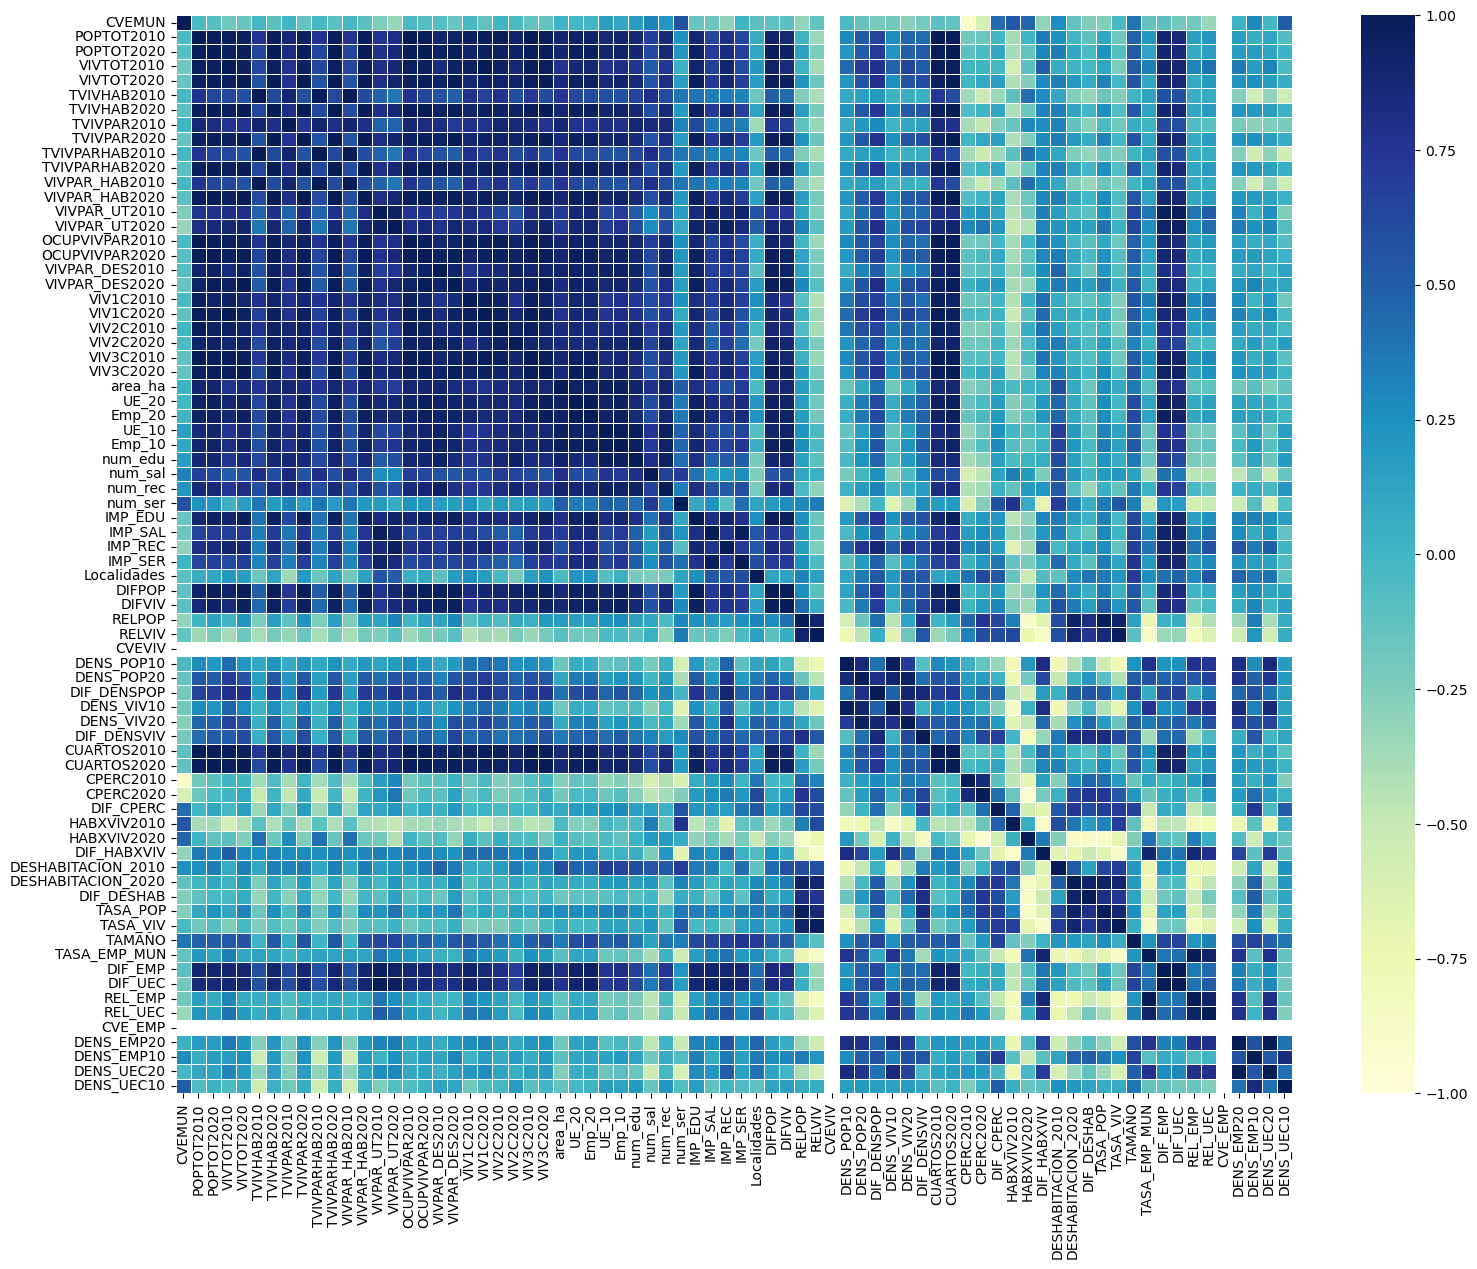

In [101]:
#df a analizar
MAPA_CM_f = MAPA_df_d

# Filtrar solo las columnas numéricas
MAPA_CM_f_numeric = MAPA_CM_f.select_dtypes(include=[np.number])

# Completa
correlaciones = MAPA_CM_f_numeric.corr()
display(correlaciones)

# Crear el heatmap de correlación
plt.figure(figsize=(18, 14))
ax = sns.heatmap(correlaciones, vmin=-1, vmax=1, annot=False, cmap="YlGnBu", linewidths=.5)
plt.show()

## Análisis factorial

In [102]:
#limpiar columnas
MAPA_df_continuo = MAPA_df.drop(columns=['CVEMUN','CVE_MET', 'NOM_MET', 'TIPO_MET','CVEPOP', 'CVEVIV', 'CVE',
       'TIPOLOGIA','R_DESHAB_2010', 'SUBTIPOLOGÍA', 'CVE_EMP',
       'CVE_UEC', 'CVE_ue', 'TIPOLOGIA_ue',  'R_TAM', 'SUBTIPOLOGÍA_ue','TIPO_MUN'])

#seleccionar micro-db de cada nivel de deshabitación
MAPA_df_a = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'a']
MAPA_df_b = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'b']
MAPA_df_c = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'c']
MAPA_df_d = MAPA_df_continuo[MAPA_df_continuo.R_DESHAB_2020 == 'd']

print("FULL: ",len(MAPA_df_continuo))
print("DESHAB A: ",len(MAPA_df_a))
print("DESHAB B: ",len(MAPA_df_b))
print("DESHAB C: ",len(MAPA_df_c))
print("DESHAB D: ",len(MAPA_df_d))

FULL:  421
DESHAB A:  24
DESHAB B:  253
DESHAB C:  137
DESHAB D:  7


In [103]:
# # Nombre del archivo y nombre de la pestaña donde deseas guardar los datos
# excel_file = r"C:\Users\Alejandro\Downloads\DATA\Factorial\Nacional\Nacional_Factorial_Mun.xlsx"

# sheet_name = 'Deshab FULL'
# sheet_name_2 = 'Significativo'

# Nombre del archivo y nombre de la pestaña donde deseas guardar los datos
excel_file = r"Z:\VOCES\DATA\Factorial\Nacional\Nacional_Factorial_Mun.xlsx"

sheet_name = 'Deshab FULL'
sheet_name_2 = 'Significativo'


Chi square
nan nan

Modelo KMO
0.884055912159868



C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Valores propios
[ 3.75142978e+01  7.96700400e+00  5.45424730e+00  3.04202063e+00
  2.36740470e+00  1.81498814e+00  1.55368694e+00  1.39265084e+00
  1.31462214e+00  1.01803732e+00  9.03861790e-01  8.49518973e-01
  8.15177675e-01  7.32542476e-01  6.95270383e-01  5.84944769e-01
  4.92312522e-01  3.50039131e-01  3.34870359e-01  2.62091060e-01
  1.94694254e-01  1.84821101e-01  1.68494111e-01  1.30513346e-01
  1.20238473e-01  1.00723704e-01  9.64168775e-02  8.54664583e-02
  6.69220796e-02  6.24255332e-02  5.64926694e-02  5.22113575e-02
  3.79719656e-02  3.08269448e-02  2.55025045e-02  2.47616724e-02
  2.18345866e-02  1.54551953e-02  1.32835403e-02  1.22808738e-02
  8.03476257e-03  7.43214924e-03  5.80800125e-03  5.12903911e-03
  3.77940188e-03  3.18534931e-03  2.35276069e-03  9.04139402e-04
  7.70743684e-04  6.72517617e-04  4.12593631e-04  3.92313055e-04
  6.13856496e-05  4.38815054e-05  4.10009443e-05  2.95827855e-05
  9.99655253e-06  6.28798440e-06  5.60417570e-06  1.49766499e-06
  4.28429

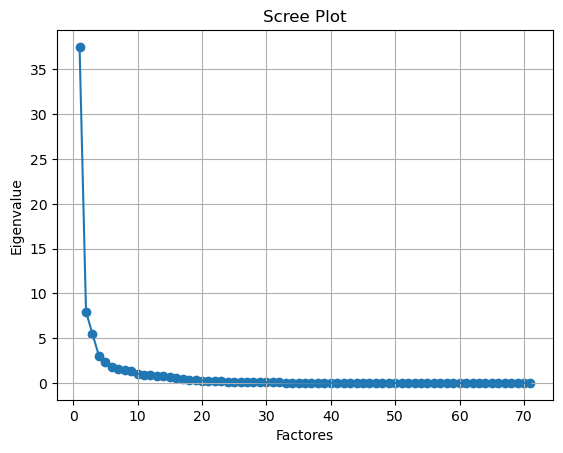

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.911852,0.318338,-0.044284,0.032041,-0.070019,0.169162
POPTOT2020,0.939855,0.256439,0.049216,0.048372,-0.057122,0.165702
VIVTOT2010,0.924349,0.302227,-0.036640,0.092098,-0.062060,0.143459
VIVTOT2020,0.947256,0.249253,0.061342,0.110992,-0.050489,0.111301
TVIVHAB2010,0.925673,0.039232,-0.060002,0.150957,0.015086,-0.030880
...,...,...,...,...,...,...
REL_UEC,-0.119917,-0.177708,0.280124,0.036436,0.821947,-0.018492
DENS_EMP20,0.196908,0.855613,-0.108360,0.185323,-0.070487,0.000088
DENS_EMP10,0.165851,0.858839,-0.113969,0.165573,-0.151306,-0.001972
DENS_UEC20,0.211233,0.893008,-0.133869,-0.015632,-0.057069,-0.064775


,A1,A2,A3,A4,A5,A6
SS Loadings,32.612788,9.024984,6.007206,4.147728,2.792775,2.331349
Proportion Var,0.459335,0.127112,0.084609,0.058419,0.039335,0.032836
Cumulative Var,0.459335,0.586447,0.671056,0.729475,0.768810,0.801645


In [104]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_continuo

# borrar columnas

MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# #escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [105]:
# Escribir los loadings en la pestaña especificada del archivo Excel
with pd.ExcelWriter(excel_file, engine='openpyxl') as writer:
    loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
        
    # Agregar título a la tabla de loadings
    worksheet = writer.sheets[sheet_name]
    worksheet.cell(row=1, column=1, value='Loadings')

print("El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.")

El archivo Excel ha sido creado y los loadings han sido guardados exitosamente.


In [106]:
# Verificar si el archivo ya existe
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        # Cargar el libro de trabajo existente
        book = writer.book

        # Si la hoja ya existe, mostrar mensaje
        if sheet_name_2 in book.sheetnames:
            print(f"La hoja {sheet_name_2} ya existe en el archivo {excel_file}.")
        else:
            # Guardar los loadings en una nueva pestaña
            loadings_df.to_excel(writer, sheet_name=sheet_name_2, startrow=0, index=True)

            # Obtener la hoja de trabajo
            worksheet = writer.sheets[sheet_name_2]

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']

            print(f"Los loadings han sido guardados exitosamente en la nueva pestaña '{sheet_name_2}'.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña 'Significativo'.


### Rango a

In [107]:
sheet_name = 'Deshab A'

Chi square
-inf 1.0

Modelo KMO
nan

Valores propios
[ 4.06206511e+01  1.21230900e+01  5.39274764e+00  2.94661729e+00
  2.38311418e+00  1.56503807e+00  1.37328696e+00  9.08065073e-01
  8.88001550e-01  6.81849031e-01  5.92422964e-01  4.83206245e-01
  3.88274536e-01  1.82537120e-01  1.49898727e-01  9.26848473e-02
  8.60940904e-02  5.83619772e-02  4.05749323e-02  1.77421333e-02
  1.62395087e-02  5.87017868e-03  3.63187437e-03  2.15664583e-15
  1.65846826e-15  1.55508119e-15  1.39029295e-15  1.27734586e-15
  1.09128707e-15  9.24337675e-16  7.92210422e-16  7.89388158e-16
  7.56853360e-16  7.27422514e-16  6.28507397e-16  6.28196418e-16
  4.78961240e-16  3.85737645e-16  3.36907420e-16  3.17011909e-16
  2.66647038e-16  2.36517330e-16  1.84512165e-16  6.97908066e-17
  4.18851126e-17  9.01181941e-18 -2.07451326e-17 -1.00599114e-16
 -1.24458094e-16 -1.45069549e-16 -1.72663986e-16 -2.16853393e-16
 -2.98364772e-16 -3.77452854e-16 -4.59035657e-16 -5.45053323e-16
 -5.62269484e-16 -5.87804244e-16 -7.1

C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


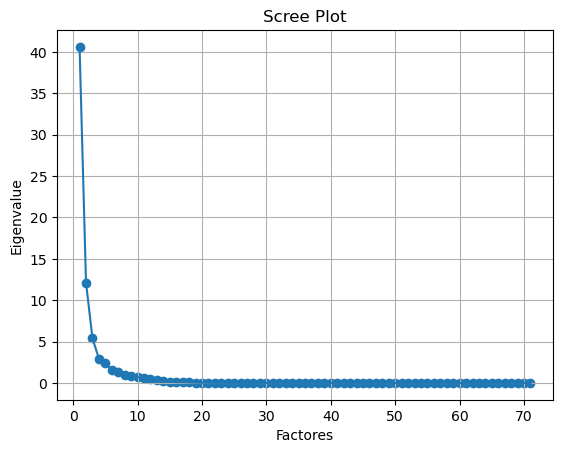

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.921365,0.375210,0.034395,-0.006533,-0.025348,0.045514
POPTOT2020,0.963820,0.214106,0.077823,0.119956,-0.029959,0.024396
VIVTOT2010,0.943206,0.308273,0.088697,0.040105,-0.029777,0.026188
VIVTOT2020,0.964208,0.181877,0.127425,0.128992,-0.035191,0.000224
TVIVHAB2010,0.958959,0.070985,0.121688,0.157607,-0.028189,0.125500
...,...,...,...,...,...,...
REL_UEC,-0.183868,-0.705795,-0.248594,0.103878,0.597546,-0.135726
DENS_EMP20,0.313655,0.833391,0.316269,-0.046099,0.040195,-0.164508
DENS_EMP10,0.322047,0.847153,0.247858,-0.072350,-0.110544,-0.208245
DENS_UEC20,0.363662,0.876508,-0.096850,0.006399,-0.107672,-0.159292


,A1,A2,A3,A4,A5,A6
SS Loadings,35.178355,13.869743,5.786089,4.950521,2.642361,1.765200
Proportion Var,0.495470,0.195348,0.081494,0.069726,0.037216,0.024862
Cumulative Var,0.495470,0.690818,0.772312,0.842038,0.879254,0.904116


In [108]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_a

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [109]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab A del archivo Excel.


### Rango b

In [110]:
sheet_name = 'Deshab B'

Chi square
nan nan

Modelo KMO
0.8855578105358709



C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Valores propios
[ 3.90279361e+01  7.27278768e+00  5.33464926e+00  3.16472772e+00
  2.10665748e+00  1.83213739e+00  1.72069873e+00  1.50751919e+00
  1.25185434e+00  9.79001842e-01  8.95495739e-01  8.10752682e-01
  7.76053009e-01  7.06144775e-01  6.04025850e-01  4.85791197e-01
  4.07425668e-01  3.62502170e-01  2.75153809e-01  2.03282355e-01
  1.82406712e-01  1.77868092e-01  1.56416905e-01  1.34350778e-01
  1.04375527e-01  8.62936116e-02  7.56688814e-02  6.25785786e-02
  4.80369773e-02  4.68112623e-02  3.49004980e-02  2.75783459e-02
  2.63625714e-02  1.92726648e-02  1.79145017e-02  1.49048002e-02
  1.35134087e-02  1.18898857e-02  8.72158007e-03  5.28368200e-03
  4.90836437e-03  3.94256956e-03  3.19664565e-03  2.27774104e-03
  1.83296159e-03  1.53994717e-03  9.94269799e-04  5.25495497e-04
  2.78298127e-04  2.27588866e-04  1.68058255e-04  1.64470192e-04
  1.38115232e-04  2.36737735e-05  1.62478292e-05  7.30783565e-06
  5.22196292e-06  3.43890872e-06  1.67002936e-06  1.02696223e-06
  4.31421

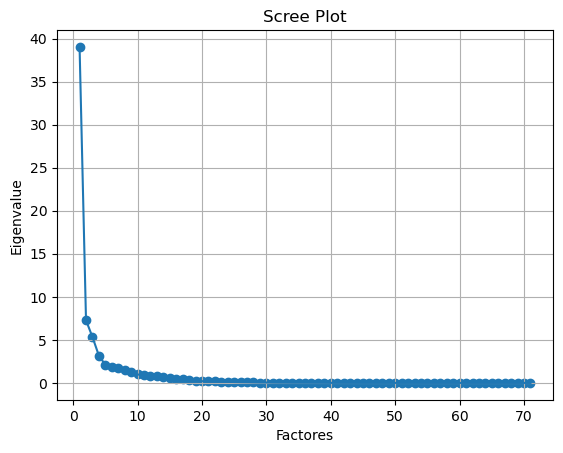

,A1,A2,A3,A4,A5,A6,A7
POPTOT2010,0.941346,0.232107,-0.066145,0.075800,-0.045268,0.086876,0.148065
POPTOT2020,0.952688,0.196667,0.041725,0.086825,-0.066851,0.123367,0.118532
VIVTOT2010,0.937897,0.235898,-0.063318,0.134103,-0.043655,0.094880,0.130206
VIVTOT2020,0.948618,0.212752,0.044909,0.140920,-0.060944,0.114975,0.098894
TVIVHAB2010,0.940231,0.016067,-0.043737,0.171951,-0.024493,0.099489,0.080387
...,...,...,...,...,...,...,...
REL_UEC,-0.132954,-0.201349,0.253729,-0.111306,0.813079,-0.037511,-0.038507
DENS_EMP20,0.166154,0.910686,-0.016076,0.246303,-0.053457,-0.120811,-0.016123
DENS_EMP10,0.137194,0.908086,-0.039132,0.219486,-0.130230,-0.153639,-0.001617
DENS_UEC20,0.173957,0.916983,-0.075059,0.047085,-0.040956,0.012010,-0.082195


,A1,A2,A3,A4,A5,A6,A7
SS Loadings,33.767412,8.674925,5.227373,4.597215,2.809009,2.325070,1.665660
Proportion Var,0.475597,0.122182,0.073625,0.064750,0.039564,0.032747,0.023460
Cumulative Var,0.475597,0.597779,0.671404,0.736154,0.775717,0.808465,0.831925


In [111]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_b

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=7, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6','A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6','A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [112]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")


Los loadings han sido guardados exitosamente en la nueva pestaña Deshab B del archivo Excel.


### Rango c

In [113]:
sheet_name = 'Deshab C'

Chi square
nan nan

Modelo KMO
0.847331182685271



C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: invalid value encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)
C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\utils.py:244: UserWarning: The inverse of the variance-covariance matrix was calculated using the Moore-Penrose generalized matrix inversion, due to its determinant being at or very close to zero.
  warnings.warn(


Valores propios
[ 3.70667527e+01  1.00750035e+01  4.25282248e+00  3.23375186e+00
  2.38295451e+00  2.14030590e+00  1.67508876e+00  1.53454724e+00
  1.32688713e+00  1.14447656e+00  1.06661053e+00  8.94736602e-01
  7.82780916e-01  5.87314043e-01  5.19216457e-01  4.72345327e-01
  3.95886377e-01  2.56278742e-01  1.92346766e-01  1.71904242e-01
  1.46360380e-01  1.05035930e-01  9.18717324e-02  8.13061640e-02
  6.51618894e-02  5.24063327e-02  4.07471539e-02  3.98367786e-02
  3.60519379e-02  3.07333892e-02  2.37869668e-02  1.78518873e-02
  1.56516910e-02  1.36188334e-02  1.09199337e-02  9.58546650e-03
  7.75916759e-03  6.98662844e-03  5.98222441e-03  5.39857550e-03
  4.41017039e-03  3.79361889e-03  2.78594893e-03  2.56485385e-03
  2.03492816e-03  1.79121003e-03  1.09105006e-03  7.90405414e-04
  5.50919329e-04  3.70740432e-04  3.20458168e-04  1.92363115e-04
  9.42272588e-05  5.55848071e-05  4.46326619e-05  2.14559847e-05
  1.38492189e-05  6.01968429e-06  2.89795991e-06  6.37037659e-07
  3.82330

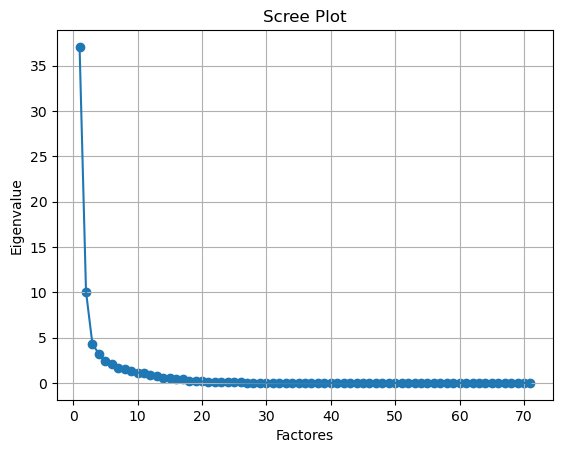

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.935076,-0.013206,0.224035,0.223067,0.071214,-0.065098
POPTOT2020,0.876675,0.119946,0.162314,0.420445,0.090577,-0.000809
VIVTOT2010,0.925419,0.003264,0.187337,0.252323,0.134937,-0.073950
VIVTOT2020,0.881659,0.119888,0.135125,0.405815,0.145144,-0.024336
TVIVHAB2010,0.905946,-0.019691,0.074341,-0.039229,0.067407,0.079584
...,...,...,...,...,...,...
REL_UEC,-0.089324,0.255205,-0.155077,0.020109,0.178193,0.792199
DENS_EMP20,0.363300,-0.177915,0.875076,-0.020929,-0.015435,-0.047877
DENS_EMP10,0.345934,-0.189932,0.837860,-0.060044,-0.000780,-0.293475
DENS_UEC20,0.214519,-0.198750,0.843495,0.017413,-0.104319,-0.077893


,A1,A2,A3,A4,A5,A6
SS Loadings,32.596478,7.221334,6.146411,4.751311,4.102885,3.236147
Proportion Var,0.459105,0.101709,0.086569,0.066920,0.057787,0.045580
Cumulative Var,0.459105,0.560814,0.647383,0.714303,0.772090,0.817670


In [114]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_c

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

#escalar
scaler = StandardScaler()

MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

#barlett test

chi_square_value,p_value=calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square')
print(chi_square_value, p_value)
print()


kmo_all,kmo_model=calculate_kmo(MAPA_df_f)
print('Modelo KMO')
print(kmo_model)
print()

# Crear un objeto FactorAnalyzer con el número de factores deseados
fa = FactorAnalyzer(n_factors=41, rotation=None)

# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Create scree plot using matplotlib
plt.scatter(range(1,MAPA_df_f.shape[1]+1),ev)
plt.plot(range(1,MAPA_df_f.shape[1]+1),ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Crear un objeto FactorAnalyzer con el número de factores deseados y rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
# Ajustar el modelo de análisis factorial a los datos
fa.fit(MAPA_df_f)
# Obtener los loadings o cargas factoriales
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Get variance of each factors
fa.get_factor_variance()

column_name = ['A1', 'A2', 'A3','A4','A5','A6']#,'A7']
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_name, index=(['SS Loadings', 'Proportion Var', 'Cumulative Var']))
display(varianza_df)

In [115]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")

Los loadings han sido guardados exitosamente en la nueva pestaña Deshab C del archivo Excel.


### Rango d

In [116]:
sheet_name = 'Deshab D'

Chi square: -inf p_value: 1.0
Modelo KMO: nan
Valores propios
[ 3.73872684e+01  1.37679891e+01  1.04253615e+01  3.74044587e+00
  3.38013193e+00  2.29880319e+00  7.16054978e-15  2.65696561e-15
  2.04673528e-15  1.70150742e-15  9.75933883e-16  8.86902381e-16
  7.84670544e-16  7.81335527e-16  6.98238849e-16  6.61709056e-16
  6.22051341e-16  6.00845940e-16  5.76217444e-16  5.11882356e-16
  4.66306868e-16  4.30045987e-16  4.24090231e-16  3.58351654e-16
  3.51653949e-16  3.08923766e-16  2.76116904e-16  2.46890912e-16
  2.27118857e-16  2.21560371e-16  1.61260074e-16  1.59249740e-16
  1.15837834e-16  8.67654067e-17  8.29166348e-17  3.68167712e-17
  1.70267717e-17 -1.56159370e-17 -2.41893514e-17 -5.73394292e-17
 -7.35825885e-17 -1.16296795e-16 -1.43280865e-16 -1.49399332e-16
 -1.56912581e-16 -1.93300063e-16 -2.02924440e-16 -2.41261695e-16
 -2.62537311e-16 -3.09485987e-16 -3.22018011e-16 -3.58254372e-16
 -3.76317625e-16 -4.05644772e-16 -4.35221528e-16 -4.83934523e-16
 -5.04165678e-16 -5.63760262

C:\Users\UTIC\anaconda3\Lib\site-packages\factor_analyzer\factor_analyzer.py:109: RuntimeWarning: divide by zero encountered in log
  statistic = -np.log(corr_det) * (n - 1 - (2 * p + 5) / 6)


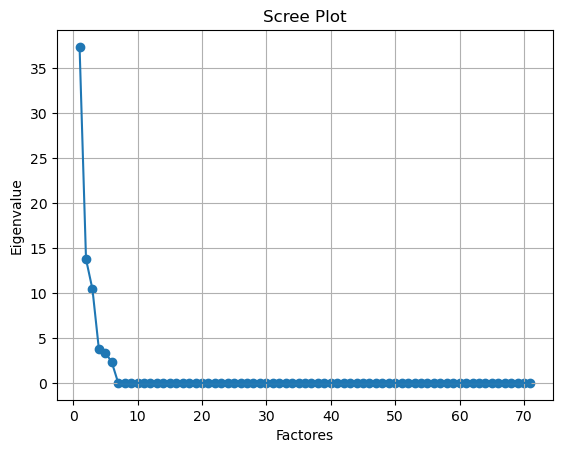

,A1,A2,A3,A4,A5,A6
POPTOT2010,0.970018,0.141843,-0.047938,0.052699,-0.113204,0.144554
POPTOT2020,0.991351,0.094126,0.051906,0.061686,-0.007738,0.040699
VIVTOT2010,0.919733,0.360838,0.069597,0.074983,-0.092668,0.068255
VIVTOT2020,0.972757,0.134047,0.167738,0.083774,0.021001,-0.004825
TVIVHAB2010,0.659663,-0.055229,-0.302538,-0.066489,-0.607959,0.309280
...,...,...,...,...,...,...
REL_UEC,0.052437,0.852564,-0.107318,0.455904,-0.188913,-0.121729
DENS_EMP20,0.087194,0.838985,-0.052804,0.302495,0.439285,-0.026618
DENS_EMP10,0.114144,0.244662,0.456893,0.067560,0.829233,0.159085
DENS_UEC20,0.034298,0.861677,-0.084260,0.239480,0.430363,-0.078481


,A1,A2,A3,A4,A5,A6
SS Loadings,35.779273,12.760592,10.124353,4.968666,4.504958,2.832159
Proportion Var,0.503933,0.179727,0.142597,0.069981,0.063450,0.039890
Cumulative Var,0.503933,0.683660,0.826257,0.896238,0.959688,0.999577


In [117]:
#asignar DF a tratar
MAPA_df_f= MAPA_df_d

# borrar columnas
MAPA_df_f = MAPA_df_f.drop(columns=[ 'R_DESHAB_2020'])

#borrar nulos
MAPA_df_f.dropna(inplace=True)

#quitar valores infinitos
MAPA_df_f = MAPA_df_f.replace([np.inf, -np.inf], np.nan).dropna()

# Escalar los datos
scaler = StandardScaler()
MAPA_df_f = pd.DataFrame(scaler.fit_transform(MAPA_df_f), columns=MAPA_df_f.columns, index=MAPA_df_f.index)

# Pruebas de esfericidad de Bartlett y KMO
chi_square_value, p_value = calculate_bartlett_sphericity(MAPA_df_f)
print('Chi square:', chi_square_value, 'p_value:', p_value)

kmo_all, kmo_model = calculate_kmo(MAPA_df_f)
print('Modelo KMO:', kmo_model)

# Análisis factorial
fa = FactorAnalyzer(n_factors=41, rotation=None)
fa.fit(MAPA_df_f)

# Obtener los valores propios (eigenvalues)
ev, v = fa.get_eigenvalues()

# Imprimir los valores propios
print("Valores propios")
print(ev)

# Crear scree plot
plt.scatter(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.plot(range(1, MAPA_df_f.shape[1] + 1), ev)
plt.title('Scree Plot')
plt.xlabel('Factores')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

# Análisis factorial con rotación Varimax
fa = FactorAnalyzer(n_factors=6, rotation="varimax")
fa.fit(MAPA_df_f)
loadings = fa.loadings_

# Imprimir los loadings
column_names = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6']#, 'A7']
loadings_df = pd.DataFrame(loadings, columns=column_names, index=MAPA_df_f.columns)
display(loadings_df)

# Obtener la varianza de cada factor
fa.get_factor_variance()
varianza_df = pd.DataFrame(fa.get_factor_variance(), columns=column_names, index=['SS Loadings', 'Proportion Var', 'Cumulative Var'])
display(varianza_df)

In [118]:
# Verificar si el archivo existe y cargarlo
if os.path.exists(excel_file):
    with pd.ExcelWriter(excel_file, engine='openpyxl', mode='a') as writer:
        book = writer.book
        if sheet_name in book.sheetnames:
            print(f"La hoja {sheet_name} ya existe en el archivo {excel_file}.")
        else:
            loadings_df.to_excel(writer, sheet_name=sheet_name, startrow=0, index=True)
            
            # Agregar título a la tabla de loadings
            worksheet = writer.sheets[sheet_name]
            worksheet.cell(row=1, column=1, value='Loadings')

            # Ajustar el ancho de las columnas
            for col in worksheet.columns:
                max_length = 0
                column = col[0].column_letter  # Obtener la letra de la columna
                for cell in col:
                    try:  # Evitar errores con celdas vacías
                        if len(str(cell.value)) > max_length:
                            max_length = len(str(cell.value))
                    except:
                        pass
                adjusted_width = (max_length + 2)
                worksheet.column_dimensions[column].width = adjusted_width

            # Aplicar una escala de colores para resaltar los valores de -1 a 1
            color_rule = ColorScaleRule(
                start_type='num', start_value=-1, start_color='FF0000',  # Rojo para -1
                mid_type='num', mid_value=0, mid_color='FFFFFF',         # Blanco para 0
                end_type='num', end_value=1, end_color='00FF00'          # Verde para 1
            )
            
            # Aplicar la regla a los loadings
            worksheet.conditional_formatting.add(f"B2:{get_column_letter(worksheet.max_column)}{worksheet.max_row}", color_rule)

            # Inmovilizar la primera fila y columna
            worksheet.freeze_panes = worksheet['B2']
        
        print(f"Los loadings han sido guardados exitosamente en la nueva pestaña {sheet_name} del archivo Excel.")
else:
    print(f"El archivo {excel_file} no existe. Por favor, crea el archivo primero.")

Los loadings han sido guardados exitosamente en la nueva pestaña Deshab D del archivo Excel.


### revisión de datos

In [119]:
print(MAPA_df.describe())

             CVEMUN    POPTOT2010    POPTOT2020     VIVTOT2010     VIVTOT2020  \
count    421.000000  4.210000e+02  4.210000e+02     421.000000     421.000000   
mean   19328.194774  1.548510e+05  1.847841e+05   49761.377672   63762.788599   
std     8211.617123  2.681856e+05  3.048111e+05   84519.510904  101918.616700   
min     1001.000000  0.000000e+00  5.230000e+02       0.000000     205.000000   
25%    15005.000000  1.162700e+04  1.527500e+04    3394.000000    4910.000000   
50%    19026.000000  4.141200e+04  5.436800e+04   12674.000000   18798.000000   
75%    29011.000000  1.472070e+05  2.021480e+05   53743.000000   73098.000000   
max    32057.000000  1.769568e+06  1.886536e+06  498852.000000  622953.000000   

        TVIVHAB2010    TVIVHAB2020   TVIVPAR2010    TVIVPAR2020  \
count    421.000000     421.000000    421.000000     421.000000   
mean    2505.534442   53213.591449   2755.007126   60190.102138   
std     3546.469432   88259.444249   3834.304086   96041.167250   
mi

In [120]:
for column in MAPA_df.columns:
    nans = MAPA_df[column].isna().sum()
    infs = np.isinf(MAPA_df[column]).sum()
    if nans > 0 or infs > 0:
        print(f"Columna {column} tiene {nans} NaNs y {infs} valores infinitos")


TypeError: ufunc 'isinf' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Histograma para cada columna
for column in MAPA_df.columns:
    plt.figure()
    sns.histplot(MAPA_df[column], kde=True)
    plt.title(f'Distribución de {column}')
    plt.show()

# Heatmap para visualizar correlaciones
plt.figure(figsize=(12, 8))
sns.heatmap(MAPA_df.corr(), annot=True, cmap='coolwarm')
plt.title('Heatmap de correlación')
plt.show()


# a